
# Clase 8: Series de Tiempo

# Tipos de datos

Los datos que analizamos con modelos se pueden categorizar en tres grandes tipos: 

- corte transversal 
- series de tiempo
- panel

## Corte transversal
Los datos de corte transversal son un tipo de datos recolectado mediante la observación de varios *sujetos* (tales como personas, países, venta de productos) en un solo punto o periodo de tiempo.  Es análogo a una *fotografía* de grupo. 


## Series de tiempo

Los datos de **Series de Tiempo** difieren de los datos de corte transversal en cuanto a que se tiene a un mismo sujeto (una persona, un país, una venta de un producto) observado en varios puntos o periodos de tiempo. 

Algunos ejemplos típicos: 
- Datos macroeconómicos (PIB. Inglación, empleo, etc.)
- Financieros (precios de acciones)
- Empresariales (Ventas, costos, etc...)

## Panel

El último tipo de datos, es lo que se llama un panel. Este es la combinacion de los dos tipos anteriores, donde para un conjunto de individuos tenemos observaciones en varios puntos o períodos de tiempo. Es uno de los tipos de datos más completos, pero también de los más difíciles de conseguir. Es importante distinguir el panel de los llamados *pooled cross-section* o datos de corte transversal agrupados en el tiempo, ya que un panel requiere que sean los mismos sujetos observados en diferentes $t$, mientras que un *pooled cross-section* son observaciones de distintos sujetos en distintos $t$.
Los paneles pueden ser cortos o largos, balanceados o desbalanceados. 

## ¿Por qué son especiales las series de tiempo?

VIDEO https://www.youtube.com/watch?v=ZoJ2OctrFLA&t=411s


#### Uso series de tiempo

La información temporal(de series de tiempo) permite responder cómo una variable (o más) responde a cambios a través del tiempo. Por ejemplo:
- ¿Cuál es el efecto causal dinámico de Xt sobre Yt? 
- ¿Cuál es la mejor predicción del valor de Y en el futuro?
  
**PERO podemos llegar a conclusiones MUY equiviocadas si no tenemos el cuidado necesario**


![Ejemplo peligroso](slide_figuras/spurius.png)


(Fuente: [https://www.tylervigen.com/spurious-correlations](https://www.tylervigen.com/spurious-correlations))

**necesitaremos técnicas nuevas.**

¿Por qué? 

Fundamentalmente a diferencias en la naturaleza del **proceso generador de datos**.

# Corte transversal vs series de tiempo

## Muestras en corte transversal

En corte transversal solemos trabajar con **MUESTRAS**

![Corte transversal](slide_figuras/datos_ct.png)

Estimamos modelos de la forma:
$$ y_{i}=\beta_{0}+\beta_{1}x_{1i}+\dots+\beta_{1}x_{ki}+u_{i} $$

Estos modelos representan una correlación marginal en las observaciones entre $y$ y $x's$  (escalada por la varianza de $x$) y para que podamos interpretarlas causalmente tenemos varias condiciones o supuestos que de se deben cumplir.

Uno de estos, es el **supuesto de exogeneidad**: $$  E[u_{i}|X_{i}]=0 $$

Sin embargo, esta forma de ver este supuesto es una **simplificación** ya que, como estamos en una muestra aleatoria, no tenemos que verificar que los efectos cruzados tambien sean exogenos:

$$  E[u_{i}|X_{j}]=0 $$

* Esto se daba por cumplido, como consecuencia de que era una muestra aletaoria.
* Lo cual, generalmente, ocurre en corte transversal por lo cual cada observación es i.i.d.




## La imposibilidad de la muestra en series de tiempo

En serie de tiempo, nuestro universo es un proceso estocástico:

![Corte transversal](slide_figuras/datos_st.png)

Estimamos modelos de la forma:

$$ y_{t}=\beta_{0}+\beta_{1}x_{1t}+\dots+\beta_{1}x_{kt}+u_{t} $$

* Estamos en presencia de un **proceso estocástico** 
* En cada momento se observa un posible resultado (o realización) del proceso estocástico.

Esto tiene varias implicancias:

* NO SON INDEPENDIENTES ya que por construcción, viene del mismo proceso.
* Por lo tanto, el supuesto de exogeneidad **$E[u_{i}|X_{i}]=0 $** NO ES SUFICIENTE
* Requerimos su versión más exigente: (Exogeneidad estricta)
$$E[u_{t}|X_{s}]=0 \qquad \forall s $$

* Este supuesto, generalmente NO SE CUMPLE.
* Si se cumpliese, podríamos seguir operando con modelos de regresión multiple estándar.

# Conceptos propios de las series de tiempo

Dado que una serie de tiempo tiene un orden específico, que en si mismo es importante. En base a este orden se suelen crear nuevos indicadores o variables. Revisemos los más comunes:

## Notación y transformaciones:

**Notación**

* Variables de series de tiempo se denominan con sub-índice $t$ para indicar el perído en el tiempo:   $y_t$
* El total de periodos se suele referir como $T$.

### Rezagos (*lags*) 

* Un **rezago**(***lag***) es el valor de la variable en períodos anteriores:   
  * Primer rezago: $y_{t-1}$ es el valor 1 período anterior
  * Segundo rezago: $y_{t-2}$ es el valor 2 períodos atrás
  * j-ésimo rezago:  $y_{t-j}$ es el valor j períodos atrás

### Diferencias

Una diferencia corresponde al cambio en una variable entre dos periodos específicos y se usa la notación $\Delta$

* Primera diferencia: $$\Delta y_t = y_t- y_{t-1}$$

### Tasas de crecimiento

Si calculamos el logaritmo natural de la primera diferencia, podemos obtener la tasa de crecimiento en una regresión:

* Primera diferencia en logs:
  $$ \Delta ln(y_{t})=ln(y_{t})-ln(y_{t-1}) $$

* Cambio porcentual de $y_t$  entre $t -1$ y $t\approx  100\times \Delta ln(y_{t})$

## Tipos de modelos

 ### Modelo estático 

 Se modela la relación contemporánea entre dos variables, i.e., relación en el mismo momento en el tiempo

$$y_{t}=\beta_{0}+\beta_{1}z_{t}+u_{t}$$

Ejemplos:
* Modelo Simple:
$$ inflación_{t}=\beta_{0}+\beta_{1}desempleo_{t}+u_{t}$$

* Modelo múltiple:
$$ homicidio_{t}=\beta_{0}+\beta_{1}condena_{t}+\beta_{2}desmepleo_{t}+\beta_{3}hombres_{t}+u_{t} $$

 ### Modelo dinámico

 Se incluyen efectos temporales, que se piensan que tienen que ver con **tendencias**, **inercia** o **estacionalidades**

 $$ inflación_{t}=\beta_{0}+\beta_{1}desempleo_{t}+\beta_{2} inflación_{t-1} +u_{t}$$

# Ejemplos diferentes series de tiempo

Revisaremos algunos ejemplos de diefernets series de tiempo para observar diferntes regularidades graficas, como tendencias, ciclos y compotamiento estacional.

## 1. PIB de EEUU

Empecemos con un ejemplo muy clásico de series de tiempo, con datos del PIB de Estados Unidos

In [1]:
# Importando librerias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#Importamos desde la carpeta
GDP = pd.read_csv('GDP.csv', parse_dates=['DATE'])


GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    290 non-null    datetime64[ns]
 1   GDP     290 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [3]:
# Seteamos el indice como la columna DATE

GDP.set_index('DATE', inplace=True)
GDP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1947-01-01 to 2019-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     290 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


In [4]:
GDP.head()

,GDP
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017


Text(0.5, 0, 'Año')

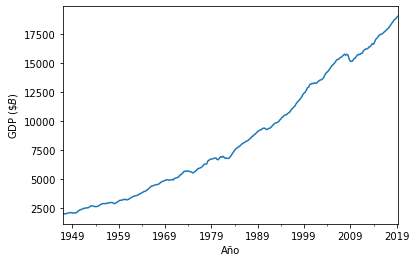

In [5]:
# Graficamos

ax = GDP['1940':].plot(legend=False) 
ax.set_ylabel(r'GDP ($\$B$)')
ax.set_xlabel(r'Año')

Se observa claramente una **tendencia** al alza.

Text(0.5, 0, 'Año')

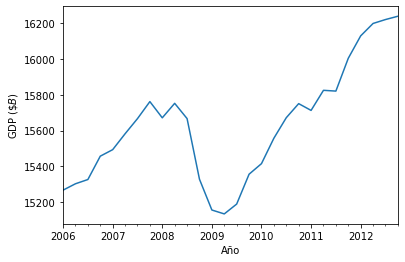

In [6]:
# Podemos mirar distintos subconjuntos de la muestra.
# Veamos por ejemplo una ventana que tenga la crisis subprime del 2008

ax = GDP['2006':'2012'].plot(legend=False) 
ax.set_ylabel(r'GDP ($\$B$)')
ax.set_xlabel(r'Año')

## 2. Mortalidad por influenza

Vemos un segundo ejemplo, con datos de salud. 

In [7]:
ILI = pd.read_csv('CDC.csv')


ILI.head()

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza,Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths
0,2012,1,8.479120,8.15718,8.49104,51102,4323,10
1,2012,2,8.343472,8.22181,8.55556,50962,4245,7
2,2012,3,8.370908,8.27534,8.60898,51010,4261,9
3,2012,4,8.448458,8.31696,8.65049,50163,4227,11
4,2012,5,8.140332,8.34602,8.67945,49568,4026,9


In [8]:
ILI['date'] = ILI['Year']+ILI['Week']/52. # forma un poco pirata de hacerlo, pero funciona

ILI.head()



,Year,Week,Percent of Deaths Due to Pneumonia and Influenza,Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths,date
0,2012,1,8.479120,8.15718,8.49104,51102,4323,10,2012.019231
1,2012,2,8.343472,8.22181,8.55556,50962,4245,7,2012.038462
2,2012,3,8.370908,8.27534,8.60898,51010,4261,9,2012.057692
3,2012,4,8.448458,8.31696,8.65049,50163,4227,11,2012.076923
4,2012,5,8.140332,8.34602,8.67945,49568,4026,9,2012.096154


Text(0, 0.5, '% Mortalidad')

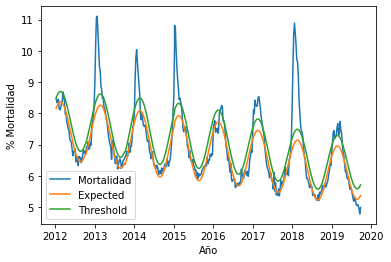

In [9]:
ILI.plot(x='date', y=['Percent of Deaths Due to Pneumonia and Influenza', 'Expected', 'Threshold'])
ax = plt.gca() # get current axis
ax.legend(['Mortalidad', 'Expected', 'Threshold'])
ax.set_xlabel('Año')
ax.set_ylabel('% Mortalidad')

El comportamiento es muy diferente, podemos ver una **estacionalidad**.

Es decir hay un cambio periodico asociado al tiempo de la variable.

¿Cómo es esta estacionalidad?
¿Cómo se esperaría que fuera en Chile?



# Transformaciones

En base a estos conceptos, entonces, es muy comun realizar transformaciones a las series de tiempo ya sea para obtener rezagos, diferencias, tasas de crecimiento, etc.  

Ilustraremos varios de estos, con el dataset del Dow-Jones Indsutrial Average.


In [10]:
#cargamos los datos
DJIA = pd.read_csv('DJIA.csv', parse_dates=['DATE'], na_values='.').dropna()


DJIA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2608
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2515 non-null   datetime64[ns]
 1   DJIA    2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


Text(0.5, 0, 'Año')

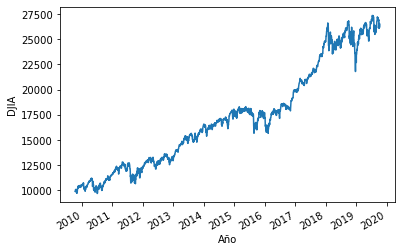

In [11]:
#graficamos
DJIA.plot(x='DATE', legend=False)
ax = plt.gca()
ax.set_ylabel('DJIA')
ax.set_xlabel('Año')



## Diferencias

Una manera de remover tendencias de un dataset es diferenciandolo. Como nuestros datasets son discretos, usaremos diferencias finitas.

In [12]:
def differentiate(values, d=1):
    # First value is required so that we can recover the original values with np.cumsum
    x = np.concatenate([[values[0]], values[1:]-values[:-1]])

    if d == 1:
        return x
    else:    
        return difference(x, d - 1)

In [13]:
values = DJIA['DJIA'].values
differences = differentiate(values)

Como podemos ver, el grafico se ve mucho más estacionario.

Text(0, 0.5, 'Differences')

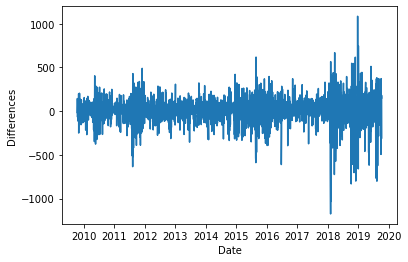

In [14]:
plt.plot(DJIA['DATE'].iloc[1:], differences[1:])
plt.xlabel('Date')
plt.ylabel('Differences')

Para recuperar la data original, basta con integrar los puntos diferenciados. 

In [15]:
def integrate(values, d=1):
    x = np.cumsum(values)
    
    if d == 1:
        return x
    else:
        return integrate(x, d-1)

In [16]:
rebuilt = integrate(differences)

Y un chequeo rapido para ver que son los mismos valores

In [17]:
np.mean(rebuilt-values)

0.0

Text(0, 0.5, 'Differences')

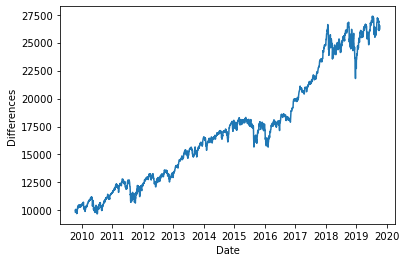

In [18]:
# Graficamente es la misma serie original

plt.plot(DJIA['DATE'].iloc[1:], rebuilt[1:])
plt.xlabel('Date')
plt.ylabel('Differences')

In [19]:
DJIA

,DATE,DJIA
0,2009-10-12,9885.80
1,2009-10-13,9871.06
2,2009-10-14,10015.86
3,2009-10-15,10062.94
4,2009-10-16,9995.91
...,...,...
2604,2019-10-04,26573.72
2605,2019-10-07,26478.02
2606,2019-10-08,26164.04
2607,2019-10-09,26346.01


In [20]:
# más fácil con el método diff de pandas
DJIA['differences_pandas'] = DJIA['DJIA'].diff()

DJIA['differences_pandas'] == differences

0       False
1        True
2        True
3        True
4        True
        ...  
2604     True
2605     True
2606     True
2607     True
2608     True
Name: differences_pandas, Length: 2515, dtype: bool

## Windowing

Muchas veces queremos calcular variables de cierta cantidad en una ventana de datos.


In [21]:
def rolling(x, order):
    npoints = x.shape[0]
    running = []
    
    for i in range(npoints-order+1):
        running.append(x[i:i+order])
        
    return np.array(running)


In [22]:
#Veamos un ejemplo sencillo
values = np.arange(11)
values
rolling(values, 6)


array([[ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10]])


Como tenemos un array con todas las ventanas, esto facilita el calculo de medias moviles o otras variables que requieran calculo iterativo en ciertos intervalos.

In [23]:
rolling(values, 2)


array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10]])

In [24]:
rolling(values, 2).mean(axis=1)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [25]:
#O el maximo, o lo que sea, etc.

rolling(values, 2).max(axis=1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [26]:
# con pandas
values_pd = pd.Series(values)


## Suavizamiento Exponencial

Otra manera de suavizar una serie de tiempo ruidosa es mediante el *suavizamiento exponencial*.
Esto equivale a realizar una media movil ponderada donde el peso de los valores del pasado son exponencialmente reducidos. Esto es particularmente apropiado cuando la fuente primaria de variación es un comportamiento aleatorio.


In [27]:
def ES(values, alpha= 0.05):
    N = len(values)
    S = [values[0]*alpha]
    
    for i in range(1, N):
        S.append(alpha*values[i]+(1-alpha)*S[-1])
        
    return np.array(S)


Podemos ver rapidamente, que mientras menor es el valor del alpha, menos ruidosa (o más suave) es el resultado.

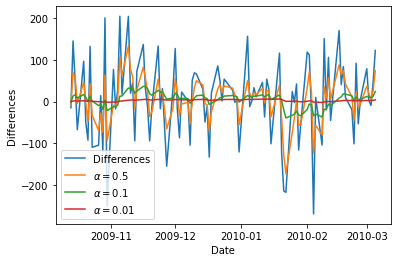

In [28]:
smooth = []
smooth.append(ES(differences[1:], 0.01))
smooth.append(ES(differences[1:], 0.1))
smooth.append(ES(differences[1:], 0.5))
plt.plot(DJIA['DATE'].iloc[1:100], differences[1:100], label='Differences')
plt.plot(DJIA['DATE'].iloc[1:100], smooth[2][:99], label=r'$\alpha=0.5$')
plt.plot(DJIA['DATE'].iloc[1:100], smooth[1][:99], label=r'$\alpha=0.1$')
plt.plot(DJIA['DATE'].iloc[1:100], smooth[0][:99], label=r'$\alpha=0.01$')
plt.xlabel('Date')
plt.ylabel('Differences')
plt.legend()

## Missing Data

Desafortunadamente, los datos no siempre están limpios o completos, lo que nos obliga a lidiar datos faltantes. Aquí ilustramos varios enfoques para introducir valores perdidos. Comenzamos generando un conjunto de datos con valores perdidos.


In [29]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
y_missing = y.copy()
y_missing[40:55] = np.nan


Esta es solo una funcion coseno, con algunos missing (na o perdidos) en su peak.

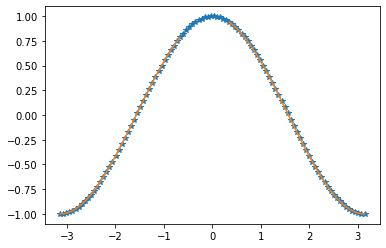

In [30]:
# graficamnte

plt.plot(x, y, '*') # los valores reales en azul con *
plt.plot(x, y_missing) # los valores con el missing en linea naranja


Quizás la estrategia más común es simplemente mantener el último valor 'bueno' conocido y usarlo para completar los puntos de datos faltantes. Este enfoque no puede lidiar con los valores faltantes al comienzo del conjunto de datos. 


In [31]:
def ffill(y):
    y0 = y.copy()
    N = len(y0)
    
    current = None
    for i in range(1, N):
        if np.isnan(y0[i]):
            y0[i] = current
        else:
            current = y0[i]
    
    return y0


Naturalmente, el enfoque opuesto también es común cuando usamos el siguiente valor bueno. De esta manera podemos manejar fácilmente los valores perdidos iniciales, pero no podemos hacer nada con los valores perdidos al final de la serie de tiempo.



In [32]:

def bfill(y):
    y0 = y.copy()
    N = len(y0)
    
    current = None
    for i in range(N-1, 0, -1):
        if np.isnan(y0[i]):
            y0[i] = current
        else:
            current = y0[i]
    
    return y0


Back-fill y Forward-fill son enfoques simples pero poderosos para lidiar con los datos faltantes. Sin embargo, a menudo queremos tener más cuidado con el valor que atribuimos. Un enfoque común es interpolar entre el valor anterior y el siguiente y conectarlos con una línea recta.



In [33]:
def interpolate(y):
    y0 = y.copy()
    N = len(y0)
    
    pos = 0
    while pos < N:
        if np.isnan(y0[pos]):
            count = 0
            
            while np.isnan(y0[pos+count]):
                count += 1
            
            current = y0[pos-1]
            future = y0[pos+count]
            slope = (future-current)/count
            
            y0[pos:pos+count] = current + np.arange(1, count+1)*slope
            
            pos += count
        else:
            pos += 1
            
    return y0


La imputación de datos (el cálculo de los valores perdidos esperados) es un gran subcampo de estadísticas con una amplia gama de técnicas y enfoques. 

In [34]:
y_bfill = bfill(y_missing)
y_ffill = ffill(y_missing)
y_inter = interpolate(y_missing)


Y graficamos para ver las diferencias.

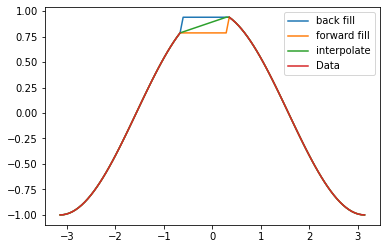

In [35]:
plt.plot(x, y_bfill, label='back fill')
plt.plot(x, y_ffill, label='forward fill')
plt.plot(x, y_inter, label='interpolate')
plt.plot(x, y_missing, label='Data')
plt.legend()

## Resampling

En muchos casos, también necesitamos cambiar la frecuencia a la que estamos operando. Por ejemplo, nuestro conjunto de datos DJIA tiene valores al final del día, pero podríamos estar interesados en puntos de datos semanales o mensuales. El remuestreo es una serie de técnicas diseñadas para lidiar con esta situación y es similar en espíritu a las técnicas de ventanas que vimos anteriormente. La principal diferencia es que en lugar de simplemente mover la ventana en un paso fijo, cada ventana corresponde a nuestro período de interés.


In [36]:
mapping = DJIA['DATE'].dt.year
values = DJIA['DJIA'].values


En el caso más simple, simplemente calculamos cuál es la ventana correcta para cada punto de datos y la agregamos en consecuencia.

In [37]:
def groupBy(values, mapping, func = None):
    agg = {}
    pos = {}
    
    for i in range(values.shape[0]):
        key = mapping.iloc[i]
        
        if key not in agg:
            agg[key] = []
        
        pos[key] = i
        
        if not np.isnan(values[i]):
            agg[key].append(values[i])
        
    order = sorted(agg.keys())
    
    if func is not None:
        for key in agg:
            agg[key] = func(np.array(agg[key]).astype('float'))
            
    return agg, pos


Naturalmente, esta función groupBy es útil no solo para remuestrear sino también para una amplia gama de análisis estadísticos. Además de un mapeo, también debemos especificar qué función de agregación queremos usar. ¿Nos interesa el valor medio? ¿el maximo? ¿Desviación Estándar?

In [38]:
agg, pos = groupBy(values, mapping, np.mean)

Aca simplemente calculamos la media por año

In [39]:
agg

{2009: 10232.334385964914,
 2010: 10668.589087301589,
 2011: 11957.570238095239,
 2012: 12965.28744,
 2013: 15009.523492063492,
 2014: 16777.690912698414,
 2015: 17587.029166666664,
 2016: 17927.107341269842,
 2017: 21750.20374501992,
 2018: 25046.85734939759,
 2019: 26000.832040816327}

Como nuestra función groupBy también devuelve las posiciones de índice de la última vez que se vio cada bin, podemos comparar fácilmente los datos originales con los muestreados nuevamente.

Text(0.5, 0, 'Año')

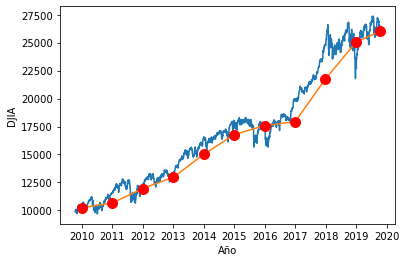

In [40]:
aggregated = []

for key in pos:
    aggregated.append([pos[key], agg[key]])

aggregated = np.array(aggregated)
aggregated
plt.plot(DJIA['DATE'], DJIA['DJIA'])
ax = plt.gca()
ax.plot(DJIA.set_index('DATE').index[aggregated.T[0].astype('int')], aggregated.T[1])
ax.plot(DJIA.set_index('DATE').index[aggregated.T[0].astype('int')], aggregated.T[1], 'ro', markersize=10,)
ax.set_ylabel('DJIA')
ax.set_xlabel('Año')

## Jackknife estimators

Finalmente, en muchos casos queremos estimar cantidades estadísticas de series de tiempo. Un ejemplo obvio podría ser estimar la media móvil de una serie sin tendencia para verificar si de hecho está lo suficientemente cerca de cero para ser considerada estacionaria.

El estimador JackKnife nos permite obtener no solo el valor esperado en cuestión, sino también una medida de su varianza. Esto se logra mediante el uso de un enfoque de omisión para calcular N estimaciones de nuestra métrica. A partir de esta población de estimación, podemos obtener los promedios como la mejor estimación posible y la desviación estándar como una medida de las barras de error involucradas.


In [41]:
def jackknife(x, func, variance = False):
    N = len(x)
    pos = np.arange(N)
    values = [func(x[pos != i]) for i in pos]
    jack = np.sum(values)/N
    
    if variance:
        values = [np.power(func(x[pos != i]) - jack, 2.0) for i in pos]
        var = (N-1)/N * np.sum(values)
        return jack, var
    else:
        return jack

In [42]:
x = np.random.normal(0, 2, 100)
print(x.std())
jackknife(x, np.std, True)

2.1019834399044157


(2.1018300750448504, 0.019197369447979902)


Con jackknife obtenemos no solo una estimación del valor sino también una medida del error

## Bootstrapping

Otra técnica común para estimar propiedades estadísticas se conoce como bootstrapping y está estrechamente relacionada con Jackknife. En este enfoque, simplemente tomamos muestras (con reemplazo) de la población original para obtener una medida de cuánta variabilidad se puede esperar.


In [43]:
def bootstrapping(x, n_samples, func=np.mean):
    y = x.copy()
    N = len(y)
    population = []
    
    for i in range(n_samples):
        population.append(func(np.random.choice(y, N, replace=True)))
        
    return np.array(population)


Podemos generar fácilmente un histograma de las muestras bostrappeadas

In [44]:
def histogram(values, n_bins=100):
    xmax = values.max()
    xmin = values.min()
    delta  = (xmax-xmin)/n_bins
    
    counts = np.zeros(n_bins+1, dtype='int')
    
    for value in values:
        val_bin = np.around((value-xmin)/delta).astype('int')
        counts[val_bin] += 1.0
    
    bins = xmin+delta*np.arange(n_bins+1)
    
    return bins, counts/values.shape[0]


In [45]:
  
x = np.random.normal(0, 2, size=100)


In [46]:

boot = bootstrapping(x, 1000)


In [47]:

x.mean()


-0.10638330157198375

In [48]:
x.std()


1.9753953015895795

In [49]:
bins, counts = histogram(boot)


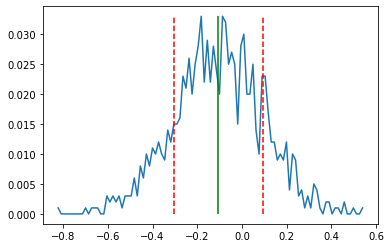

In [50]:
plt.plot(bins, counts)
plt.vlines(x=boot.mean(), ymin=0, ymax=counts.max(), label='mean', color='g')
plt.vlines(x=boot.mean()+boot.std(), ymin=0, ymax=counts.max(), label='std', linestyles='--', color='r')
plt.vlines(x=boot.mean()-boot.std(), ymin=0, ymax=counts.max(), label='std', linestyles='--', color='r')


## PAUSA

In [51]:
# Vamos a explorar datos de uso de bicicletas en Seul.

# Importando datos
seul = pd.read_csv('SeoulBikeData.csv', encoding="latin_1") ## OJO con el encoding
seul.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [52]:
# de qué tipo es cada variable en el dataset?
print(seul.dtypes)



Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object


In [53]:
# Importando datos usando parse_dates
#seul = pd.read_csv('data/public_bikes_2018/seul/SeoulBikeData.csv', encoding="latin_1",  ## OJO con el encoding
#     parse_dates=["Date"],  infer_datetime_format=True)
#seul.head()

In [54]:
# Cambiando el tipo de dato de la variable "Date" a datetime
seul['fecha'] = pd.to_datetime(seul['Date'],format='%d/%m/%Y')
seul.dtypes
#print(seul['fecha'].sample(100).head())


Date                                 object
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
fecha                        datetime64[ns]
dtype: object

In [55]:
# ventajas de objetos de tipo datetime
print(seul['fecha'].min())
print(seul['fecha'].max())
print(seul['Date'].min())
print(seul['Date'].max())
print(seul['fecha'].min()-seul['fecha'].max())

2017-12-01 00:00:00
2018-11-30 00:00:00
01/01/2018
31/12/2017
-364 days +00:00:00


In [56]:
# supongamos que quiero añadir una nueva columna al df que sea el dia de la semana
seul['dia_semana'] = seul['fecha'].dt.day_name()
# y el número de la semana
seul['semana'] = seul['fecha'].dt.week
seul.head()


C:\Users\pablo\AppData\Local\Temp\ipykernel_22244\3194463658.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  seul['semana'] = seul['fecha'].dt.week


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,fecha,dia_semana,semana
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,Friday,48
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,Friday,48
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,Friday,48
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,Friday,48
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,Friday,48


<AxesSubplot:xlabel='fecha'>

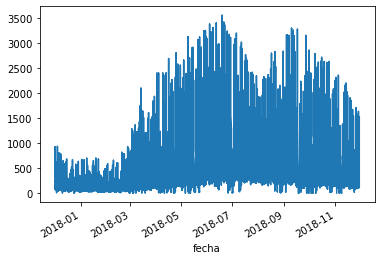

In [57]:
seul.set_index('fecha', inplace=True) # seteando la fecha como indice
seul['Rented Bike Count'].plot() # graficando la variable "Rented Bike Count"



<AxesSubplot:xlabel='fecha'>

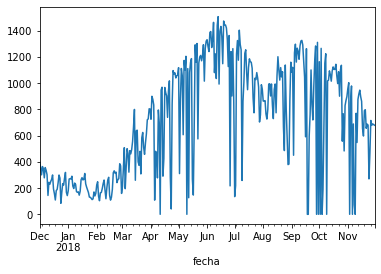

In [58]:
seul_day = seul.resample('D').mean() # resampleando a diario
seul_day['Rented Bike Count'].plot() # graficando la variable "Rented Bike Count"


<AxesSubplot:xlabel='fecha'>

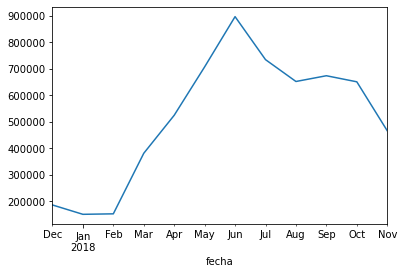

In [59]:
seul_month = seul.resample('M').sum() # resampleando por mes
seul_month['Rented Bike Count'].plot() # graficando la variable "Rented Bike Count"


<AxesSubplot:xlabel='fecha'>

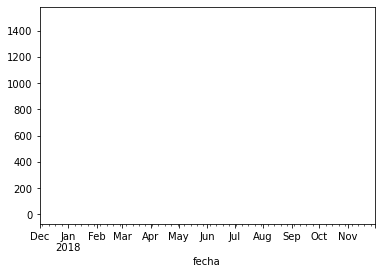

In [60]:
seul_h = seul.resample('H').mean() # resampleando por hora, promedio
seul_h['Rented Bike Count'].plot() # graficando la variable "Rented Bike Count"


<AxesSubplot:xlabel='Hour'>

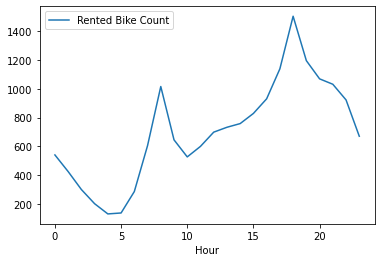

In [61]:
# por qué pasó esto?


seul[['Rented Bike Count','Hour']].groupby(["Hour"]).mean().plot()

Lo ideal sería que la fecha y hora (datetime) quedaran leídos por pandas.


In [62]:
seul['fecha_hora']= pd.to_datetime( seul['Date'] + ' ' + seul['Hour'].astype(str) + ':00:00', format='%d/%m/%Y %H:%M:%S')

In [63]:
seul.set_index('fecha_hora', inplace=True) # seteando la fecha como indice  

<AxesSubplot:xlabel='fecha_hora'>

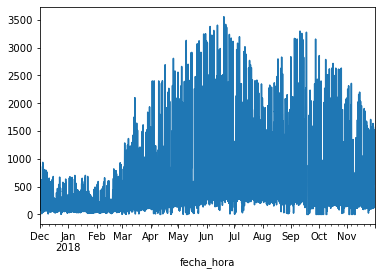

In [64]:
seul_h = seul.resample('H').mean() # resampleando por hora, promedio
seul_h['Rented Bike Count'].plot() # graficando la variable "Rented Bike Count"


<AxesSubplot:xlabel='fecha_hora'>

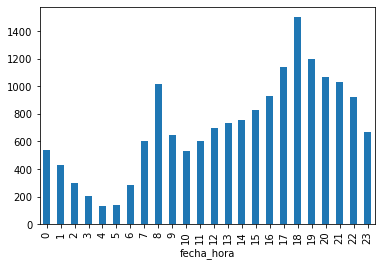

In [65]:
seul.groupby(seul.index.hour)['Rented Bike Count'].mean().plot(kind="bar") # resampleando por hora, promedio



# Volvamos a la materia

In [66]:
# importamos librerías

import sklearn
from sklearn.linear_model import LinearRegression

import scipy
from scipy import stats

import statsmodels
import statsmodels.api as sm


# Supuestos no cumplidos y opciones


Para poder interpretar causalmente un modelo de regresión lineal multiple en series de tiempo necesitamos que se cumplan los siguientes supuestos de Gauss Markov:

1. Modelo lineal en parámetros
$$y_{t}=\beta_{0}+\beta_{1}x_{1t}+\dots+\beta_{1}x_{kt}+u_{t}$$

2. Media condicionada nula o exogeneidad (que ahora es estricta)
$$ E[u_{t}|X_{js}]=0 \quad \forall s$$
3. No hay colinealidad perfecta.
4.  Homoscedasticidad
$$ Var[u_{t}|X_{js}]=\sigma \quad \forall s $$

5. No hay correlación serial.
$$ Cov[u_{t}, u_{s}|X_{js}]=\sigma \quad \forall s\ne t$$

Cada uno de estos supuestos tiene diferentes implicancias:

1-3 es que el estimador de MCO $\hat{\beta}$ es insesgado.
4-5 que tiene minima varianza de los estimadores lineales (eficiente)

1-5 -> MELI -> Mejor Estimador Lineal Insesgado (BLUE en inglés)

Vemos que hay dos elementos diferentes a corte transversal: cambia la exogeneidad a un supuesto estricto, y aparece un nuevo supuesto, correlación serial. 


# Objetivos diferentes de los modelos

Los modelos de regresión se pueden usar con dos objetivos principales: predicción y explicación.  En este bloque nos enfocaremos en la primera aplicación.

Un modelo de regresión puede ser útil para la predicción, aún cuando ninguno de sus coeficientes tenga interpretación causal. 

Desde el punto de vista de la predicción, lo que es importante es que el modelo entregue una predicción lo más precisa posible. 

La idea base es aprovechar las peculiaridades de las series temporales: la dependencia temporal y tendencias, para identificar patrones en la data que enriquezcan la predicción aun cuando no tengan valor explicativo. Estos elementos los incluiremos DENTRO de la regresión, para que represente de mejor manera el fenómeno a predecir.


# Patrones de dependencia intertemporal

¿Cuándo falla supuesto de exogeneidad estricta?

Cuando tenemos **particularidades temporales** actuando en el proceso estocástico, consecuencia de su naturaleza:

* Efecto rezagado (variable independiente rezagada)
* Retroalimentación entre variables
* Auto-dependencia, la variable depende de si misma en el pasado (variable dependiente rezagada, AR(1) )



¿Cómo identificar estos problemas?

1. Debemos pensar en el tipo de datos que deseo analizar (macroeconomico, acciones, ventas, etc) y posibles dinamicas en el tiempo que podrían estar presentes.
2. Chequeamos grafica y estadísticamente:
- Estacionareidad
- Presencia de ciclos
- Presencia de quiebres estructurales

3. Sobre la serie estacionaria, estimamos modelos.

## Estacionareidad

Entenderemos estacionareidad si el futuro se parece al pasado, al menos en un sentido probabilistico.



Una serie es estacionaria estricta si:

1. Su distribución de probabilidad no varia en el tiempo, 
2. Su media, varianza y covarianza es constante
   
   Si solo se cumple 2, es estacionaria débil.

### Ejemplo


Hay muchos ejemplos de tipos de no estacionareidad. Ilustremos los más tipicos con unos ejemplos ficticios.

In [67]:
x = np.linspace(0, np.pi*10, 360)
y = np.sin(x)

Podemos generar los diferentes tipos con algunas manipulaciones algebráicas.

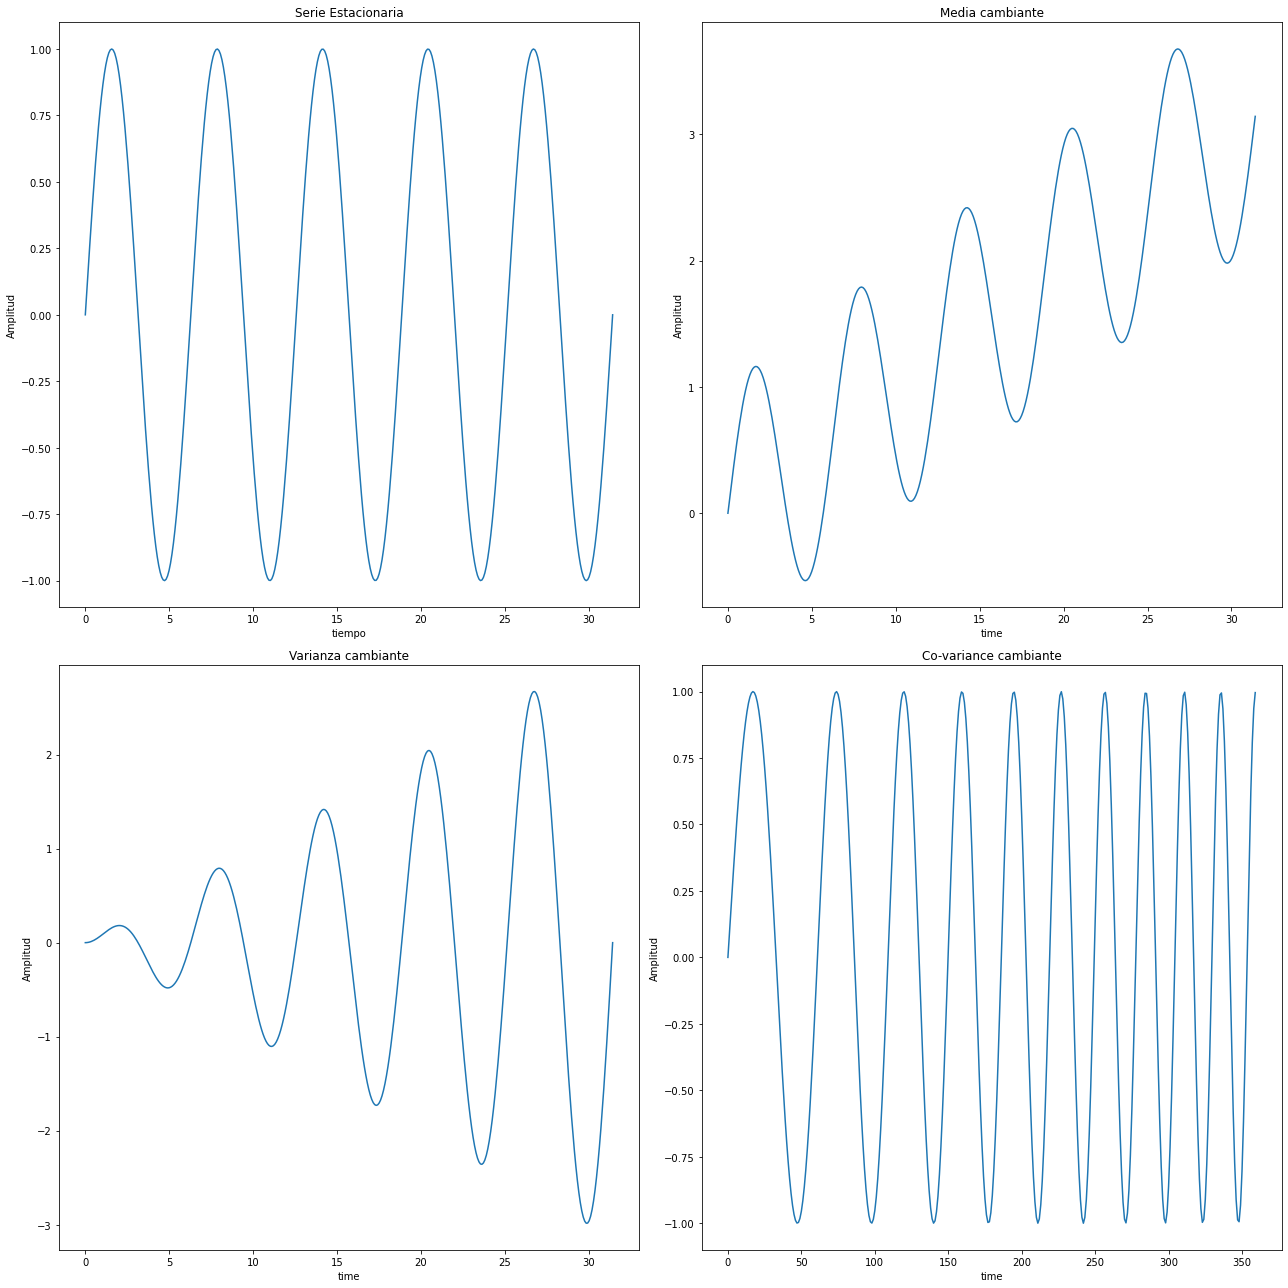

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(18, 18))
axs[0][0].plot(x, y)
axs[0][0].set_title('Serie Estacionaria')
axs[0][0].set_xlabel('tiempo')
axs[0][0].set_ylabel('Amplitud')

axs[0][1].plot(x, y+x/10)
axs[0][1].set_title('Media cambiante')
axs[0][1].set_xlabel('time')
axs[0][1].set_ylabel('Amplitud')


axs[1][0].plot(x, y*x/10)
axs[1][0].set_title('Varianza cambiante')
axs[1][0].set_xlabel('time')
axs[1][0].set_ylabel('Amplitud')

axs[1][1].plot(np.sin(x+x*x/30))
axs[1][1].set_title('Co-variance cambiante')
axs[1][1].set_xlabel('time')
axs[1][1].set_ylabel('Amplitud')

plt.tight_layout()

### Ausencia de estacionareidad 1: Tendencias

Un claro ejemplo de series no estacionarias es cuando hay tendencias. Podemos identificar la tendencia a tarvés de una **media movil**
Revisemoslo con los datos de pasajeros de aerolineas.

In [69]:
# Cargar datos

airline = pd.read_csv('international-airline-passengers.csv', sep=';')

# Convertir a datetime
airline['Month'] = pd.to_datetime(airline['Month']+'-01')
airline.set_index('Month', inplace=True)

Con un grafico rápido, identificamos que está todo bien y que efectivamente se observa que la serie no es estacionaria.

Text(0, 0.5, 'Pasajeros')

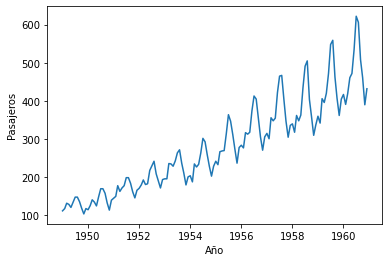

In [70]:
fig, ax = plt.subplots(1, 1)
ax.plot(airline.index, airline['Passengers'])
ax.set_xlabel('Año')
ax.set_ylabel('Pasajeros')

Podemos identificar la tendencia en los datos, al calcular la media movil.

In [71]:
def running_average(x, order):
    current = x[:order].sum()
    running = []
    
    for i in range(order, x.shape[0]):
        current += x[i]
        current -= x[i-order]
        running.append(current/order)
    
    return np.array(running)

Esta función es autoexplicativa. Simplemente corre en el dataset paso a paso y calcula la media en una ventana específica. Ahora podemos agregar esta línea de tendencia al gráfico anterior.

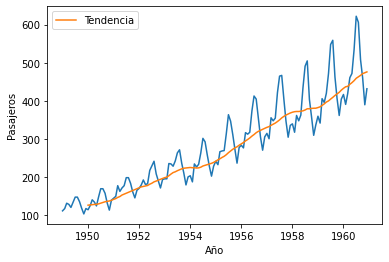

In [72]:
trend = running_average(airline['Passengers'], 12)

fig, ax = plt.subplots(1, 1)
ax.plot(airline.index, airline['Passengers'])
ax.set_xlabel('Año')
ax.set_ylabel('Pasajeros')
ax.plot(airline.index[12:], trend, label='Tendencia')
ax.legend()

A la serie, entonces, le podemos sacar esta tendencia, al dividr.

In [73]:
detrended = airline.iloc[12:].values.flatten()/trend

Y graficamente:

Text(0, 0.5, 'Detrended value')

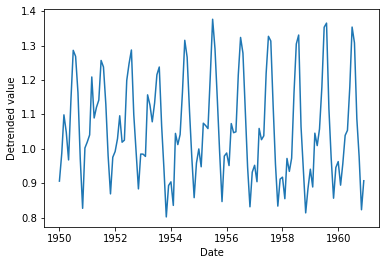

In [74]:
fig, ax = plt.subplots(1, 1)
ax.plot(airline.index[12:], detrended)
ax.set_xlabel('Date')
ax.set_ylabel('Detrended value')

### Ausencia de estacionareidad 2: Estacionalidad (no confundir con estacionareidad)

Es cuando hay un patron claro de ciclos que se repite en el tiempo. Generalmente los identificamos a priori con una inspección del grafico. Podemos usar una función para identificarlos. 

In [75]:
def plot_seasons(detrended, order, plot_mean = True):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    N = len(detrended)

    data = np.array([detrended[i::order] for i in range(order)])
    
    means = np.mean(data, axis=1)
    medians = np.median(data, axis=1)
    
    counts = [0]
    counts.extend([len(data[i]) for i in range(order)])
    counts = np.cumsum(counts)

    ticks = (counts[:-1]+counts[1]/2)
    
    for i in range(order):
        values = data[i, :]
        npoints = len(values)

        plt.plot(range(counts[i], counts[i+1]), values, c=colors[0])
        plt.plot(range(counts[i], counts[i+1]), np.ones(npoints)*means[i], c=colors[1])
        plt.plot(range(counts[i], counts[i+1]), np.ones(npoints)*medians[i], c=colors[2])

    plt.legend(['data', 'mean', 'median'])
    plt.xlabel('season')
    plt.ylabel('values')
    plt.xticks(ticks, np.arange(order));
    
    if plot_mean:
        plt.plot(ticks, means, c=colors[3])
    
    return means

Acá, simplemente vamos a graficar la curva para diferentes periodos en la temporada. Esto se hace yendo a traves del dataset con un stride igual al periodo estacional.

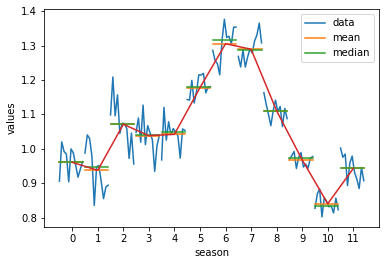

In [76]:
means = plot_seasons(detrended, 12)

La figura tambien nos provee una forma arquetípica de comportamiento estacional. COn esto, podememos terminar la descomposición de la data en tres componentes.

In [77]:
# Descomposición multiplicativa
def decomposition(data, order, plot=True):
    values = data.values.flatten()
    trend = running_average(values, order)
    detrended = values[order:]/trend
    
    season = [detrended[i::order].mean() for i in range(order)]
    seasonality = np.array(season*(detrended.shape[0]//order+1))[:detrended.shape[0]]
    residuals = values[order:]/(trend*seasonality)

    if plot:
        fig, axs = plt.subplots(4, 1, figsize=(22, 16), sharex=True)
        index = data.index

        axs[0].plot(index, values)
        axs[0].set_title('Data original')
        
        axs[1].plot(index[order:], trend)
        axs[1].set_title('Tendencia')

        axs[2].plot(index[order:], detrended)
        axs[2].set_title('Estacionalidad')

        axs[3].plot(index[order:], residuals)
        axs[3].set_title('Residuos')
        
    return values, trend, seasonality, residuals

Con esto , el patron estacional se remueve al repetir el patron medio estacional identificado anteriormente y dividiendo, desde la data sin tendencia. El resultado de esta disvision son simpemente los residuos. Lo que nos muestra que esta descomposición es demasiado sencilla aun.

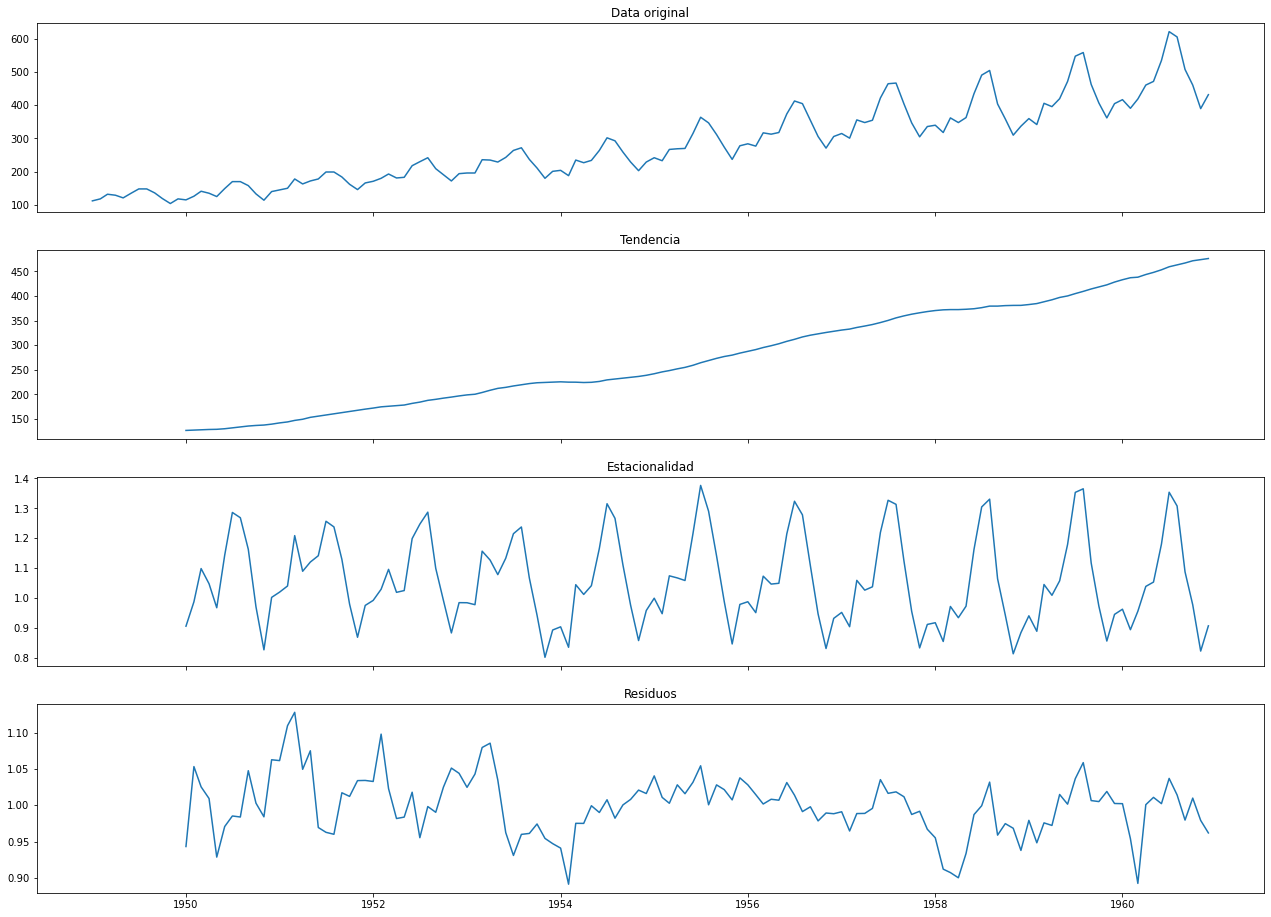

In [78]:
values, trend, seasonality, residuals = decomposition(airline, 12)

Acá usamos una descomposición multiplicativa, pero este mismo proneso se podría haber hecho siguiendo una descomposición aditiva, con pequeños cambios al codigo.

### Ausencia de estacionareidad 3: Quiebre estructural

Otro tipo de no estacionaeridad se presenta cuando la función de regresión poblacional cambia en el transcurso de la las observaciones. Esto puede ocurrir por varios motivos, por ejemplo cambios en una politica económica, cambios en la estructura de la economía, un nuevo invento o disrupción tecnológica, etc.


Si ocurren tales "cambios estructurales" o "rupturas", entonces un modelo de regresión que no tenga en cuenta esos cambios puede proporcionar una base engañosa para la inferencia ya la predicción.

Las estrategias para identificar un cambio estructurale son varias revisaremos dos: 
- Contrastes de hipótesis comparando cambios en los coeficientes de regresión mediante estadístico F o Test de Chow. 
- La segunda es biuscar potenciales cambios estructurales desde la predicción: se simula que la mmuestra termina antes de lo que realmente lo hace y se comparan las predicciones. Los cambios estructurales se detectan cuando la capacidad de predicción es sustancialmente peor de lo esperado.

## Correlación serial y autocorrelación.


Los datos de series temporales, generalmente están relacionadas con sus valores pasados.

**Razones:** inercia, reacciones rezagadas, entre otras.

Matemáticamente:

(Autocovarianza)
$$ Cov[u_{t}, u_{s}|X_{js}] \neq \sigma \quad \forall s\ne t$$


* Cuando una variable depende de sus propios valores en el pasado se denomina **autocorrelacion**

* Si los valores de una variable X en el presente están correlacionados con valores pasados de otra variable, Y, se conoce como **correlación serial**

* A veces se usan los términos como sinónimos.

Podemos identificar la correlación serial de tres maneras:
- Graficamente en los residuos
- Estadísticamente mediante la prueba de White o de Breaush y Pagan.


### Realicemos un ejemplo ficticio

La mayoría de las medidas de correlación para series de tiempo están basadas en la correlación de Pearson, asi que partiremos definiendolo en una función.

In [79]:
def pearson(x, y):
    meanx = x.mean()
    meany = y.mean()
    stdx = x.std()
    stdy = y.std()
    
    return np.mean((x - meanx) * (y - meany)) / (stdx * stdy)

In [80]:
# Genermos una data aleatoria, que por ende no deberia tener quiebres ni tendencias.

x = np.random.random(1000)
y = np.random.random(1000)

Hay perfecta correlación propia

In [81]:
pearson(x, x)

0.9999999999999999

In [82]:
pearson(y, y)

1.0

Por definición, dos sets de variables aleatorias estan no correlacionados. Veamos el grafico.

Text(0, 0.5, 'y')

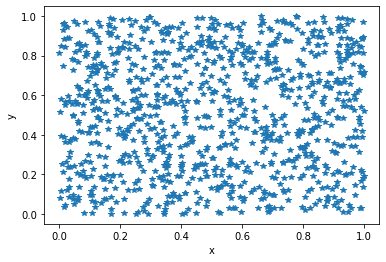

In [83]:
fig, axs = plt.subplots(1, 1)
axs.plot(x, y, '*')
axs.set_xlabel('x')
axs.set_ylabel('y')

Por lo cual, el coeficiente de correlacón de Pearson debería ser muy cercano a cero.

In [84]:
pearson(x,y)

0.02727958046395724

Sin embargo, sin agregamos una tendencia a estos set de valores rapidamente tenemos una fuerte correlación **A PESAR** de que no estan relacionados en realidad.


In [85]:
trend = np.linspace(1, 5, 1000)
pearson(x+trend, y+trend)

0.9419327994507198

Por este motivo, **SIEMPRE** debemos analizar las condiciones de estacionareidad y tendencias antes de analizar una serie, y quitarle dichas tendencias.

### Auto-correlación

Como observamos, por construcción la correlación de una variable consigo misma es 1. Pero, si vamos aumentando un lag respecto a la observación, la correlación se difumina.

In [86]:
def acf(x, lag=40):
    return np.array([1] + [pearson(x[:-i], x[i:]) for i in range(1, lag)])

Text(0, 0.5, 'ACF')

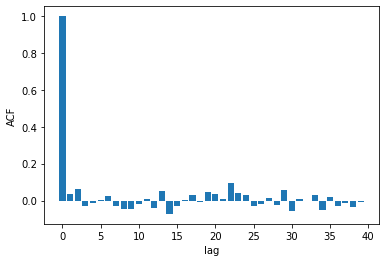

In [87]:
plt.bar(range(40), acf(x, 40))
plt.xlabel('lag')
plt.ylabel('ACF')

Entonces, podemos saber si hay autocorrelación si esta es significativamente diferente de cero. En nuestro ejemplo ficticio, podemos calcular el intervalo de confianza y descartar cualquiera que caiga dentro de este.

In [88]:
def acf_ci(acfv, n, alpha=0.05):
    se = [1 / np.sqrt(n)]
    se.extend(np.sqrt((1+2*np.cumsum(np.power(acfv[1:-1], 2)))/n))
    se = np.array(se)
    
    se *= stats.norm.ppf(1-alpha/2.)
    return se

In [89]:
def plot_acf(x, lag=40, alpha=0.05):
    acf_val = acf(x, lag)
    
    plt.vlines(range(lag), 0, acf_val)
    plt.scatter(np.arange(lag), acf_val, marker='o')
    plt.xlabel('lag')
    plt.ylabel('ACF')
    
    # Determinar intervalo de confianza
    ci = acf_ci(acf_val, len(x), alpha)
    plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

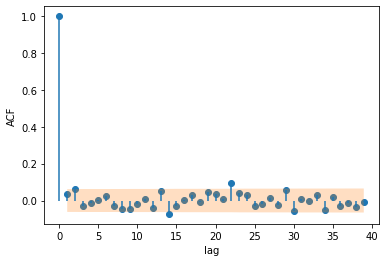

In [90]:
plot_acf(x)

Pasemos a un ejemplo real, volvamos a la serie de GDP que trabajamos al principio:

In [91]:
#Importamos desde la carpeta
GDP = pd.read_csv('GDP.csv', parse_dates=['DATE'])
GDP.set_index('DATE', inplace=True)


Text(0, 0.5, 'GDP ($\\$B$)')

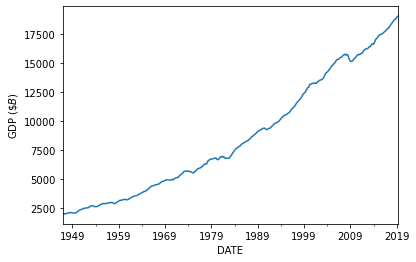

In [92]:
ax=GDP.plot(legend=False)
ax.set_ylabel(r'GDP ($\$B$)')

In [93]:
values = GDP['GDP'].values
detrended = values[1:]-values[:-1]

Como la serie tiene una fuerte tendencia, la auto-correlación parece ser significativa inluso para largos periodos.

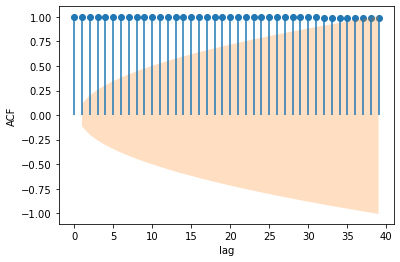

In [94]:
plot_acf(values)

Esto solo nos dice, que con mayor razón debemos sacarle la tendencia la serie.

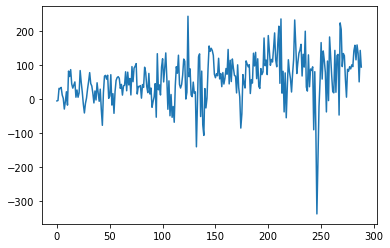

In [95]:
plt.plot(detrended)

Text(0, 0.5, 'QoQ Change ($\\$B$)')

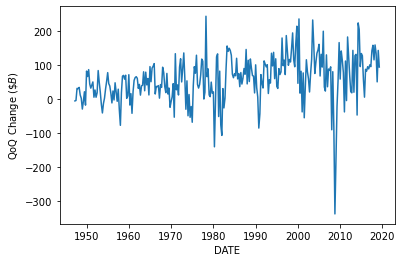

In [96]:
plt.plot(GDP.index[1:], detrended)
plt.xlabel('DATE')
plt.ylabel(r'QoQ Change ($\$B$)')

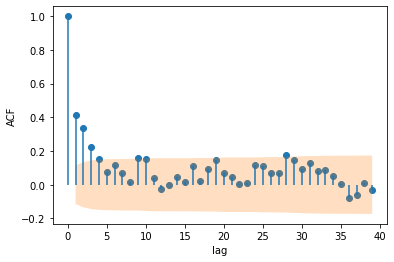

In [97]:
plot_acf(detrended)

AHora que sacamos el ruido, es mucho más informativa para modelar.

### Auto-correlación parcial

LA función de autocorrelación considera la serie completa para cada lag

In [98]:
def rolling(x, order):
    npoints = x.shape[0]
    running = []
    
    for i in range(npoints-order+1):
        running.append(x[i:i+order])
        
    return np.array(running)

Podemos definir silimar la correlación parcial, solo que en cada lag trata de tener en cuenta la cantidad de correlación que ya ha sido explicada por los anteriores lags usando un modelo lineal para predecir $x_t$ e $x_{t-1}$

In [99]:
def pacf(x, lag=40):
    y = []
    
    for i in range(3, lag + 2):
        windows = rolling(x, i)

        xt = windows[:, -1] # Current values are at the end
        xt_l = windows[:, 0] # Lagged values are at 0
        inter = windows[:, 1:-1] # Intermediate values are in between 1 and -1
        
        
        lm = LinearRegression(fit_intercept=False).fit(inter, xt)
        xt_fit = lm.predict(inter)

        lm = LinearRegression(fit_intercept=False).fit(inter, xt_l)
        xt_l_fit = lm.predict(inter)

        y.append(pearson(xt - xt_fit, xt_l - xt_l_fit))
    
    # Pad the array with the two missing values
    pacf_1 = acf(x, 2)[1]
    return np.array([1, pacf_1] +  y)

In [100]:
def plot_pacf(x, alpha=0.05, lag=40):
    pacf_val = pacf(x, lag)
    plt.vlines(np.arange(lag + 1), 0, pacf_val)
    plt.scatter(np.arange(lag + 1), pacf_val, marker='o')
    plt.xlabel('lag')
    plt.ylabel('PACF')
    
    # Determine confidence interval
    ci = acf_ci(pacf_val, len(x))
    plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

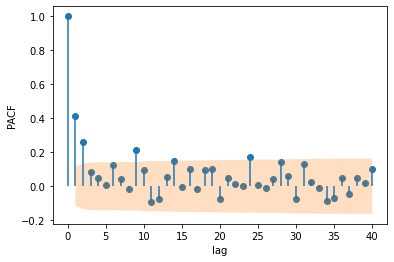

In [101]:
plot_pacf(detrended)


# Prueba estadística para tendencias estocásticas

Hasta ahora, nuestra implementación ha sino principalmente grafica. Para detectar tendencias estocásticas se suele usar el contraste de **raiz unitaria** AR

Se usa la idea de que , al menos en muestras grandes, el coeficiente de autocorrelación estará cerca de 1 si hay tendencia estocástica. Por lo cual se puede contrastar mediante una prueba de hipótesis de que hay tendencia estocástica, frente a la de que no hay ninguna tendencia.

Uno de los constrastes más comunes es el de **Dickey-Fuller**

En AR(1), se estima el paseo aleatorio y se contrasta la hipótesis  de que no hay tendencias estocasticas, vs si.

$$ \text{H}_0: \beta_1=1 \quad \text{vs} \quad \text{H}_1: \beta_1<1 \quad \text{en} \quad y_t=\beta_0+ \beta_1y_{t-1}+u_t$$

Una forma más facil de realizar este test, es transformando el modelo mediante la diferencia:

$$ \text{H}_0: \gamma=0 \quad \text{vs} \quad \text{H}_1:\gamma<0  \quad \Delta y_t= \gamma \Delta y_{t-1}+u_t$$


**Dickey-Fuller Aumentado**

Cuando no sabemos que tipo de proceso autorregresivo tienen los datos, se puede generalizar el analisis usando el Auggmented Dickey-Fuller (ADF). En este el modelo autorregresivo tiene p rezagos. 

Recordemos los datos de los viajes aereos:

In [102]:
# Cargar datos

airline = pd.read_csv('international-airline-passengers.csv', sep=';')
airline['Month'] = pd.to_datetime(airline['Month']+'-01')
airline.set_index('Month', inplace=True)

airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


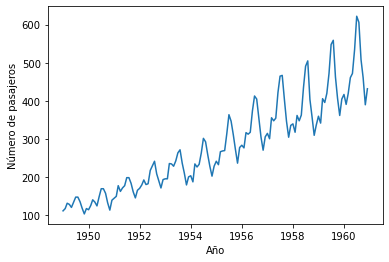

In [103]:
plt.xlabel('Año')
plt.ylabel('Número de pasajeros')
plt.plot(airline)

La inspección visual indica que hay una tendencia, revisemos los resultados de la prueba ADF:

In [104]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(airline['Passengers'])

print('ADF stat: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))



ADF stat: 0.8153688792060502
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


Es observable que el ADF está muy lejos del valor crítico y el p-valor es mayor que 0.05, por lo cual no se rechaza la existencia de raiz unitaria. Hay evidencia de que la serie es no estacionaria.

Una forma de sacar la tendencia, como vimos, es con la primera diferencia.

In [105]:
values = airline['Passengers'].values
detrended = values[1:]-values[:-1]

In [106]:
result=adfuller(detrended)

print('ADF stat: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF stat: -2.829266824170006
p-value: 0.05421329028382468
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


Y observamos, que ahora si estamos bajo el valor crítico, por lo cual la serie es estacionaria.

# Modelando: Modelos Autorregresivos

Para modelar, entonces este tipo de datos recurriremos a una familia de mnodelos que se llaman auto-regresivos. Esto quiere decir, que incluye rezagos como regresores para poder considerar la interdependencia temporal de los datos en el modelamiento.


## MEDIAS MOVILES (MA)


Empezamos por definir un modelo de media movil. Este es un modelo autorregresivo de "memoria corta" que se define como:

$$ x_t=\epsilon_t + \theta \epsilon_{t-1} $$

In [107]:
def MA(epsilon, theta, mean=0):
    theta = list(theta)
    N = len(epsilon)
    theta0 = np.array([1] + theta)
    theta0 = theta0[::-1] # Invert the order
    q = len(theta0)
    
    X = []
    for i in range(N-q):
        X.append(np.dot(theta0, epsilon[i:i+q])+mean)
    
    return np.array(X)

Esta función simplemente multiplica el coeficiente $\theta$ con las variables estocasticas. 
Generamos algunos ejemplos y los visualizamos.

In [108]:
N = 500
thetas = []
X_MA = []
q_max = 8

epsilon = np.random.normal(size=N)

for q in range(1, q_max+1, 2):
    thetas.append(np.random.random(q))
    X_MA.append(MA(epsilon, thetas[-1]))

Y las visualizamos lado a lado.

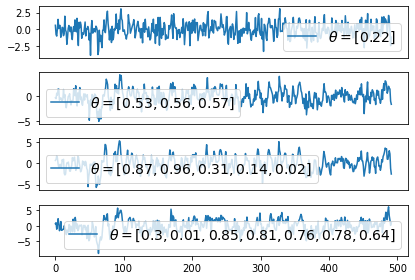

In [109]:
fig, axs = plt.subplots(4, 1)

for i in range(q_max//2):
    axs[i].plot(X_MA[i])
    axs[i].legend([r'$\theta=\left[%s\right]$' % ", ".join(thetas[i].round(2).astype('str'))], prop={'size': 14})
    axs[i].get_xaxis().set_visible(False)
    
axs[-1].get_xaxis().set_visible(True)
fig.tight_layout()

Ahora deseamos calcular el grafico de autocorrelación, asi que re introducimos las funciones que ya definimos

In [110]:
def pearson(x, y):
    meanx = x.mean()
    meany = y.mean()
    stdx = x.std()
    stdy = y.std()
    return np.mean((x - meanx) * (y - meany)) / (stdx * stdy)

def acf(x, lag=40):
    return np.array([1] + [pearson(x[:-i], x[i:]) for i in range(1, lag)])

def acf_ci(acfv, n, alpha=0.05):
    se = [1 / np.sqrt(n)]
    se.extend(np.sqrt((1+2*np.cumsum(np.power(acfv[1:-1], 2)))/n))
    se = np.array(se)
    
    se *= stats.norm.ppf(1-alpha/2.)
    return se

def plot_acf(x, lag=40, alpha=0.05):
    acf_val = acf(x, lag)
    
    plt.vlines(range(lag), 0, acf_val)
    plt.scatter(np.arange(lag), acf_val, marker='o')
    plt.xlabel('lag')
    plt.ylabel('ACF')
    
    # Determine confidence interval
    ci = acf_ci(acf_val, len(x), alpha)
    plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

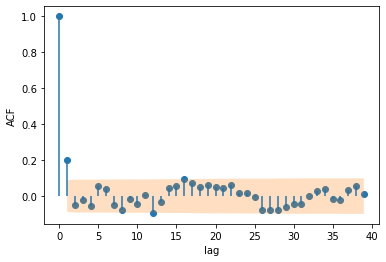

In [111]:
plot_acf(X_MA[0])

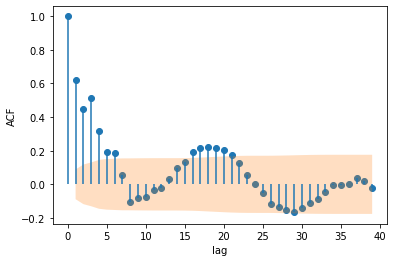

In [112]:
plot_acf(X_MA[-1])

Es observable que el número de lags significantes, pareciera ser elmismo que en el modelo MA.

## Auto regresivo (AR)

Ahora definimos el modelo autorregresivo. La función es similar a la MA pero usa posiciones en lugar de los valores estocásticos brutos
Su ecuación es:

$$ x_t=\epsilon_t + \theta x_{t-1} $$


In [113]:
def AR(epsilon, phi, drift=0):
    phi = list(phi)
    N = len(epsilon)

    phi0 = np.array([1] + phi)
    phi0 = phi0[::-1] # invertir el orden
    p = len(phi0)
    
    X = epsilon.copy()

    for i in range(p, N):
        X[i-1] = np.dot(X[i-p:i], phi0) + drift
        
    return np.array(X)

Generamos algunos ejemplos y los vizualizamos

In [114]:
N = 500
phis = []
X_AR = []
p_max = 8

epsilon = np.random.normal(size=N)

for p in range(1, p_max+1, 2):
    phis.append(np.random.normal(0, .2, p))
    X_AR.append(AR(epsilon, phis[-1]))

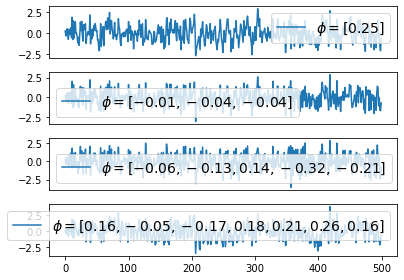

In [115]:
fig, axs = plt.subplots(4, 1)

for i in range(p_max//2):
    axs[i].plot(X_AR[i])
    axs[i].legend([r'$\phi=\left[%s\right]$' % ", ".join(phis[i].round(2).astype('str'))], prop={'size': 14})
    axs[i].get_xaxis().set_visible(False)
    
axs[-1].get_xaxis().set_visible(True)
fig.tight_layout()

Y agregamos las funciones requeridas para la Auto-correlación parcial.

In [116]:
def rolling(x, order):
    npoints = x.shape[0]
    running = []
    
    for i in range(npoints-order):
        running.append(x[i:i+order])
        
    return np.array(running)

In [117]:
def pacf(x, lag=40):
    y = []
    
    for i in range(3, lag + 2):
        windows = rolling(x.flatten(), i)

        xt = windows[:, -1] # Current values are at the end
        xt_l = windows[:, 0] # Lagged values are at 0
        inter = windows[:, 1:-1] # Intermediate values are in between 1 and -1

        lm = LinearRegression(fit_intercept=False).fit(inter, xt)
        xt_fit = lm.predict(inter)

        lm = LinearRegression(fit_intercept=False).fit(inter, xt_l)
        xt_l_fit = lm.predict(inter)

        y.append(pearson(xt - xt_fit, xt_l - xt_l_fit))
    
    # Pad the array with the two missing values
    pacf_1 = acf(x, 2)[1]
    return np.array([1, pacf_1] +  y)

In [118]:
def plot_pacf(x, alpha=0.05, lag=40):
    pacf_val = pacf(x, lag)
    plt.vlines(np.arange(lag + 1), 0, pacf_val)
    plt.scatter(np.arange(lag + 1), pacf_val, marker='o')
    plt.xlabel('lag')
    plt.ylabel('PACF')
    
    # Determine confidence interval
    ci = acf_ci(pacf_val, len(x))
    plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

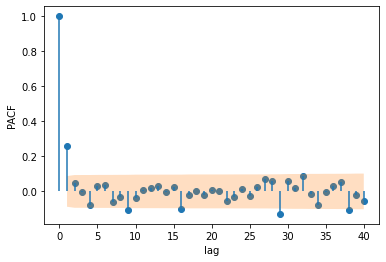

In [119]:
plot_pacf(X_AR[0])

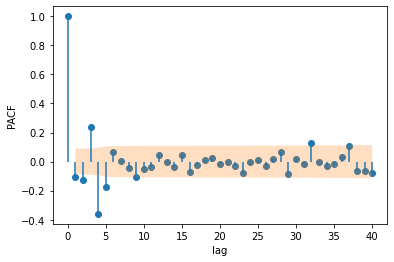

In [120]:
plot_pacf(X_AR[-2])

# ARIMA

ARIMA que significa Autoregressive Integrated Moving-Average, es un modelamiento de serie de tiempo que combina modelos auto regresivos (AR) y medias moviles (MA), con la opcion de incluir raices unitarias.

Estos modelos tienen 3 parámetros: 
* p, que son cuantos autorregresores tiene el modelo AR, 
* q que indica cuantos parametros tiene la media movil y 
* Finalmente, la combinación de ambos modelamientos es 
$$ x_t=\epsilon_t + \phi x_{t-1} + \theta \epsilon_{t-1} $$
  

Si el modelo de los datos es estacionario, entonces no es necesario diferenciar y se usa d=0. Si no lo es, requerimos diferenciar con d>1. 
  
Adicionalmente existe la clase **SARIMA**, o Seasonal- ARIMA que le agrega coeficientes que controlan por la estacionalidad.

In [121]:
def differentiate(values, d=1):
    # First value is required so that we can recover the original values with np.cumsum
    x = np.concatenate([[values[0]], values[1:]-values[:-1]])

    if d == 1:
        return x
    else:    
        return differentiate(x, d - 1)

In [122]:
def integrate(values, d=1):
    x = np.cumsum(values)
    
    if d == 1:
        return x
    else:
        
        return integrate(x, d-1)

La clase de ARIMA es una variante de la definida en [https://www.ritchievink.com/blog/2018/09/26/algorithm-breakdown-ar-ma-and-arima-models](https://www.ritchievink.com/blog/2018/09/26/algorithm-breakdown-ar-ma-and-arima-models).

In [123]:
class ARIMA(LinearRegression):
    def __init__(self, q, d, p):
        """
        An ARIMA model.
        :param q: (int) Order of the MA model.
        :param p: (int) Order of the AR model.
        :param d: (int) Number of times the data needs to be differenced.
        """
        super().__init__(True)
        self.p = p
        self.d = d
        self.q = q
        self.ar = None
        self.resid = None
        
    def prepare_features(self, x):
        if self.d > 0:
            x = differentiate(x, self.d)
                    
        ar_features = None
        ma_features = None
        
        # Determine the features and the epsilon terms for the MA process
        if self.q > 0:
            if self.ar is None:
                self.ar = ARIMA(0, 0, self.p)
                self.ar.fit_predict(x)
            eps = self.ar.resid
            eps[0] = 0
            
            # prepend with zeros as there are no residuals_t-k in the first X_t
            ma_features = rolling(np.r_[np.zeros(self.q), eps], self.q)
            
        # Determine the features for the AR process
        if self.p > 0:
            # prepend with zeros as there are no X_t-k in the first X_t
            ar_features = rolling(np.r_[np.zeros(self.p), x], self.p)
                                
        if ar_features is not None and ma_features is not None:
            n = min(len(ar_features), len(ma_features)) 
            ar_features = ar_features[:n]
            ma_features = ma_features[:n]
            features = np.hstack((ar_features, ma_features))
        elif ma_features is not None: 
            n = len(ma_features)
            features = ma_features[:n]
        else:
            n = len(ar_features)
            features = ar_features[:n]
        
        return features, x[:n]
    
    def fit(self, x):
        features, x = self.prepare_features(x)
        super().fit(features, x)
        return features
            
    def fit_predict(self, x): 
        """
        Fit and transform input
        :param x: (array) with time series.
        """
        features = self.fit(x)
        return self.predict(x, prepared=(features))
    
    def predict(self, x, **kwargs):
        """
        :param x: (array)
        :kwargs:
            prepared: (tpl) containing the features, eps and x
        """
        features = kwargs.get('prepared', None)
        if features is None:
            features, x = self.prepare_features(x)
        
        y = super().predict(features)
        self.resid = x - y

        return self.return_output(y)
    
    def return_output(self, x):
        if self.d > 0:
            x = integrate(x, self.d) 
        return x
    
    def forecast(self, x, n):
        """
        Forecast the time series.
        
        :param x: (array) Current time steps.
        :param n: (int) Number of time steps in the future.
        """
        features, x = self.prepare_features(x)
        y = super().predict(features)
        
        # Append n time steps as zeros. Because the epsilon terms are unknown
        y = np.r_[y, np.zeros(n)]
        for i in range(n):
            feat = np.r_[y[-(self.p + n) + i: -n + i], np.zeros(self.q)]
            y[x.shape[0] + i] = super().predict(feat[None, :])
        return self.return_output(y)

Tambien se puede importar directamente desde statsmodels donde debemos proveer p, d y q.

In [124]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

Estimemos el modelo con p=1 (coeficientes AR), d=1 (orden de diferenciacion), q=1 (coeficientes MA). Notar que d realiza la diferenciación y le saca la tendencia a la serie, segun los resultados del ADF.

In [125]:
modelo1_GDP = ARIMA(GDP, order=(1,1,1))
modelo1_fit=modelo1_GDP.fit()
modelo1_fit.summary()

C:\Users\pablo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\pablo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\pablo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                  290
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1607.431
Date:                Sun, 16 Oct 2022   AIC                           3220.861
Time:                        11:22:17   BIC                           3231.861
Sample:                    01-01-1947   HQIC                          3225.269
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9416      0.024     38.775      0.000       0.894       0.989
ma.L1         -0.5952      0.050    -11.800      0.000      -0.694      -0.496
sigma2      3955.1632    221.551     17.852      0.000    3520.931    4389.395
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               135.32
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.53   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Adicionalmente, está la estimacion con autoarima, que elije automaticamente p, q y d (minimizando AIC).

In [126]:
#!pip install pmdarima
from pmdarima.arima import auto_arima

In [127]:
modelo2_GDP = auto_arima(GDP, start_P=0, start_Q=0)
modelo2_GDP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  290
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1592.341
Date:                Sun, 16 Oct 2022   AIC                           3192.681
Time:                        11:22:22   BIC                           3207.333
Sample:                    01-01-1947   HQIC                          3198.553
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2925      0.046      6.353      0.000       0.202       0.383
ar.L2          0.1677      0.051      3.297      0.001       0.068       0.267
ma.L1         -0.9765      0.014    -68.045      0.000      -1.005      -0.948
sigma2      3688.7172    195.218     18.895      0.000    3306.098    4071.337
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               367.68
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Podemos ver que el algoritmo eligio un (2,2,1) para (p,d,q). 

# Eligiendo un modelo

Generalmente, la eleccion de modelos y la longitud de sus rezagos se hace mediante AIC o BIC.

AIC (Akaike Information Criterion)
$$ BIC(p) = log\left( \frac{SSR(p)}{T} \right) + (p + 1) \frac{log(T)}{T}$$

 * Menor AIC indica un mejor modelo
  
BIC (Bayesian Information Criterion)

$$ AIC(p) = log\left( \frac{SSR(p)}{T} \right) + (p + 1) \frac{2}{T}$$

  * Muy similar a AIC
  * Menor BIC indicates a better model

AIC vs BIC
La diferencia entre ambos, es como penalizan la complejidad del modelo.
BIC favorece modelos más simples que AIC.
Generalmente, AIC se prefiere para modelos predictivos y BIC para explicativos.


## Ejemplo

En nuestro ejemplo anterior, teniamos estimados dos modelos por ARIMA: modelo 1 (1,0,1) y modelo 2(2,2,1). SI tuvieramos que elegir uno de estos, deberiamos compara el AIC y/o BIC de ambos.

In [128]:
modelo1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                  290
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1607.431
Date:                Sun, 16 Oct 2022   AIC                           3220.861
Time:                        11:22:22   BIC                           3231.861
Sample:                    01-01-1947   HQIC                          3225.269
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9416      0.024     38.775      0.000       0.894       0.989
ma.L1         -0.5952      0.050    -11.800      0.000      -0.694      -0.496
sigma2      3955.1632    221.551     17.852      0.000    3520.931    4389.395
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               135.32
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.53   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
modelo2_GDP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  290
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1592.341
Date:                Sun, 16 Oct 2022   AIC                           3192.681
Time:                        11:22:22   BIC                           3207.333
Sample:                    01-01-1947   HQIC                          3198.553
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2925      0.046      6.353      0.000       0.202       0.383
ar.L2          0.1677      0.051      3.297      0.001       0.068       0.267
ma.L1         -0.9765      0.014    -68.045      0.000      -1.005      -0.948
sigma2      3688.7172    195.218     18.895      0.000    3306.098    4071.337
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               367.68
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Podemos ver que el modelo 2, elegido por AUTOARIMA, es el de menor AIC y BIC.

# Modelamiento y predicción

Con los elementos que hemos revisado, vamos a realizar un modelamiento con el 80% de la muestra y revisar su ajuste con el 20% restante. Luego con ese modelo, vamos a generar una predicción fuera de la muestra.

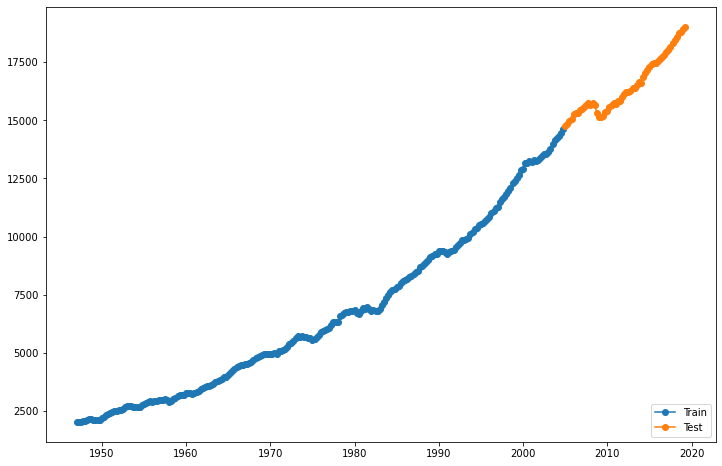

In [130]:
# Proporción entrenamiento y chequeo de ajuste

train_size = 0.8
split_idx = round(len(GDP)* train_size)
split_idx

# Split
train = GDP.iloc[:split_idx]
test = GDP.iloc[split_idx:]

# Visualizamos la division
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)
plt.legend(loc="lower right")

Ajustamos el modelo a los datos de entrenamiento.

In [200]:
train.head()

,GDP
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017


In [131]:
model=auto_arima(train, start_p=0, start_q=0)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  232
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1237.743
Date:                Sun, 16 Oct 2022   AIC                           2483.486
Time:                        11:22:27   BIC                           2497.238
Sample:                    01-01-1947   HQIC                          2489.033
                         - 10-01-2004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2536      0.066      3.818      0.000       0.123       0.384
ar.L2          0.1840      0.053      3.492      0.000       0.081       0.287
ma.L1         -0.9661      0.019    -51.604      0.000      -1.003      -0.929
sigma2      2745.0843    194.607     14.106      0.000    2363.661    3126.508
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.21
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.73   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

La opcion summary nos provee toda la información de nuestro modelo. También podemos revisar lo graficos del modelo.

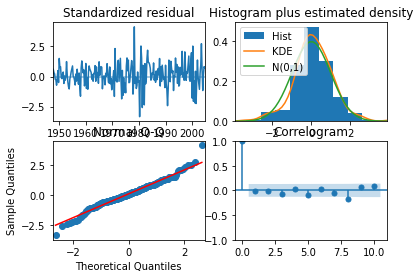

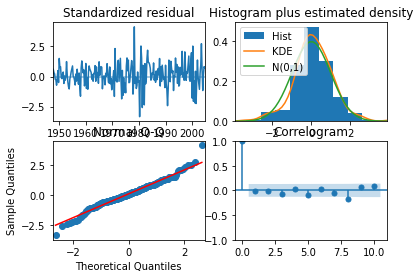

In [132]:
model.plot_diagnostics()

## Valores Ajustados- Predichos 

Usando el modelo que obtuvimos con los datos de entrenamientom vamos a revisar su ajuste prediciendo los datos de prueba.
No confundir, valores ajustados con proyección fuera de la muestra. La idea es comrbobar que tan bien el modelo predice los datos ya observados.

In [133]:
#total de valores a predecir en muestra de prueba
len(test)

58

In [134]:
prediccion = pd.DataFrame( model.predict(n_periods=len(test)), index=test.index )
prediccion.columns = ['predicted GDP']
prediccion.head()

,predicted GDP
DATE,
2005-01-01,14725.301328
2005-04-01,14834.990123
2005-07-01,14937.802089
2005-10-01,15037.814693
2006-01-01,15135.852040


Revisemos como se compara la predicción con los datos reales

<function matplotlib.pyplot.show(close=None, block=None)>

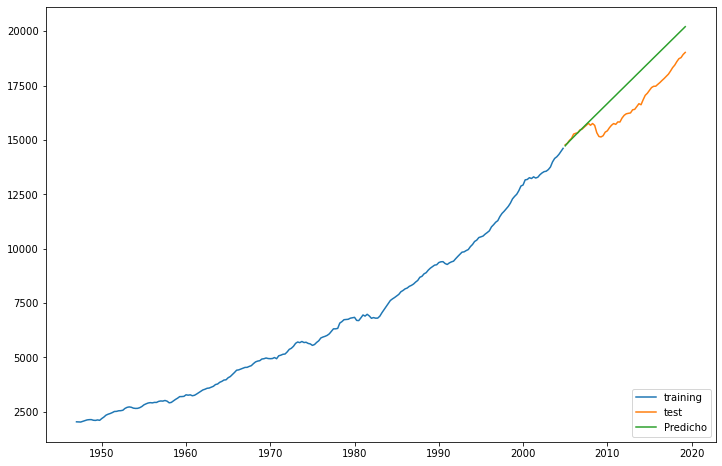

In [135]:
plt.subplots(figsize=(12,8))
plt.plot(train, label="training")
plt.plot(test, label="test")
plt.plot(prediccion, label="Predicho")
plt.legend(loc="lower right")
plt.show

Podemos ver que el modelo no ajusta tan bien, porque está incluido el dato del 2009, donde ocurre la crisis SubPrime. Veamos que ocurre si ampliamos el rango de entrenamiento para que lo incluya en el modelo y la predicción se haga sobre un menor rango.

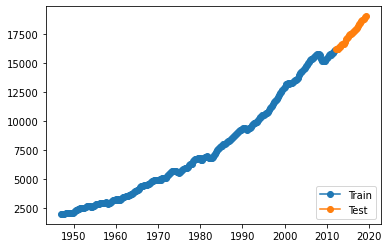

In [136]:
# Proporción entrenamiento y chequeo de ajuste

train_size = 0.9
split_idx = round(len(GDP)* train_size)
split_idx

# Split
train = GDP.iloc[:split_idx]
test = GDP.iloc[split_idx:]

# Visualizamos la division
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)
plt.legend(loc="lower right")

In [137]:
model=auto_arima(train, start_p=0, start_q=0)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  261
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1429.762
Date:                Sun, 16 Oct 2022   AIC                           2867.525
Time:                        11:22:34   BIC                           2881.752
Sample:                    01-01-1947   HQIC                          2873.245
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3138      0.052      6.026      0.000       0.212       0.416
ar.L2          0.1815      0.053      3.409      0.001       0.077       0.286
ma.L1         -0.9786      0.014    -71.619      0.000      -1.005      -0.952
sigma2      3622.7635    208.829     17.348      0.000    3213.467    4032.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               385.11
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.61   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [138]:
prediccion = pd.DataFrame( model.predict(n_periods=len(test)), index=test.index )
prediccion.columns = ['predicted GDP']
prediccion.head()

,predicted GDP
DATE,
2012-04-01,16238.065483
2012-07-01,16330.940237
2012-10-01,16415.841784
2013-01-01,16495.378938
2013-04-01,16571.785845


<function matplotlib.pyplot.show(close=None, block=None)>

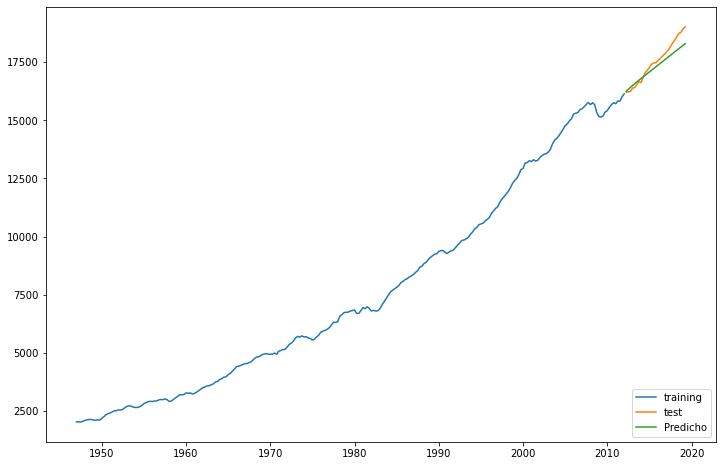

In [139]:
plt.subplots(figsize=(12,8))
plt.plot(train, label="training")
plt.plot(test, label="test")
plt.plot(prediccion, label="Predicho")
plt.legend(loc="lower right")
plt.show

Si nos fijamos, ahora la predicción es mucho mejor. Podemos seguir refinando la elección de tiempo, especialmente al considerar la posibilidad de quiebres estructurales.



## Predicciones fuera de muestra

Los modelos ARIMA son muy buenos creando predicciones fuera de muestra en un paso, es decir, el siguiente periodo después de los datos.

In [140]:
model = ARIMA(GDP, order=(2,2,1))
results = model.fit()
print(results.summary())

C:\Users\pablo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\pablo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\pablo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  290
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1592.341
Date:                Sun, 16 Oct 2022   AIC                           3192.681
Time:                        11:22:36   BIC                           3207.333
Sample:                    01-01-1947   HQIC                          3198.553
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2925      0.046      6.353      0.000       0.202       0.383
ar.L2          0.1677      0.051      3.297      0.001       0.068       0.267
ma.L1         -0.9765      0.014    -68.045      0.0

In [141]:
results.forecast(steps=1)

2019-07-01    19120.265611
Freq: QS-OCT, dtype: float64

También esta lo que se llama *multi-step out of sample forecast* o predicción fuera de la muestra en multiples pasos. EN esta se va estimando paso a paso un periodo adicional, incluyendolo en en analisis, actualizando el modelo y re-estimando. Por ejemplo, estimemos para los siguientes 20 periodos.

In [142]:
pred=results.get_forecast(steps=20, dynamic=False )
pred_ci= pred.conf_int()

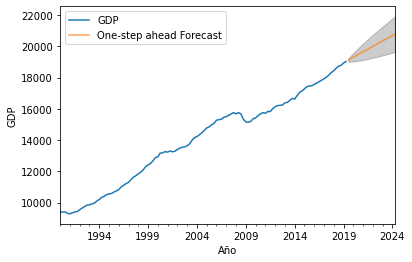

In [143]:
ax = GDP['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Año')
ax.set_ylabel('GDP')
plt.legend()
plt.show()

Finalmente, vamos a agergarle estos a un nuevo dataframe que incluya la predicción.

In [144]:
from pandas.tseries.offsets import DateOffset

future_dates=[GDP.index[-1]+ DateOffset(years=x)for x in range(-2,10)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=GDP.columns)

future_datest_df

,GDP
2018-04-01,NaN
2019-04-01,NaN
2020-04-01,NaN
2021-04-01,NaN
2022-04-01,NaN
2023-04-01,NaN
2024-04-01,NaN
2025-04-01,NaN
2026-04-01,NaN
2027-04-01,NaN


In [145]:
forecast_df=pd.DataFrame(pred.predicted_mean)

NaN=np.nan

forecast_df['GDP']=NaN
forecast_df

,predicted_mean,GDP
2019-07-01,19120.265611,NaN
2019-10-01,19211.547974,NaN
2020-01-01,19301.388594,NaN
2020-04-01,19389.613059,NaN
2020-07-01,19477.123069,NaN
2020-10-01,19564.153108,NaN
2021-01-01,19650.922959,NaN
2021-04-01,19737.536227,NaN
2021-07-01,19824.060066,NaN
2021-10-01,19910.531493,NaN


In [146]:
GDP_forecast= pd.DataFrame(GDP['GDP'])
GDP_forecast['predicted_mean']=NaN
GDP_forecast

,GDP,predicted_mean
DATE,,
1947-01-01,2033.061,NaN
1947-04-01,2027.639,NaN
1947-07-01,2023.452,NaN
1947-10-01,2055.103,NaN
1948-01-01,2086.017,NaN
...,...,...
2018-04-01,18598.135,NaN
2018-07-01,18732.720,NaN
2018-10-01,18783.548,NaN


In [147]:
GDP_forecast=pd.concat([GDP_forecast,forecast_df])
GDP_forecast

,GDP,predicted_mean
1947-01-01,2033.061,NaN
1947-04-01,2027.639,NaN
1947-07-01,2023.452,NaN
1947-10-01,2055.103,NaN
1948-01-01,2086.017,NaN
...,...,...
2023-04-01,NaN,20429.021992
2023-07-01,NaN,20515.422583
2023-10-01,NaN,20601.822495
2024-01-01,NaN,20688.222012


<AxesSubplot:>

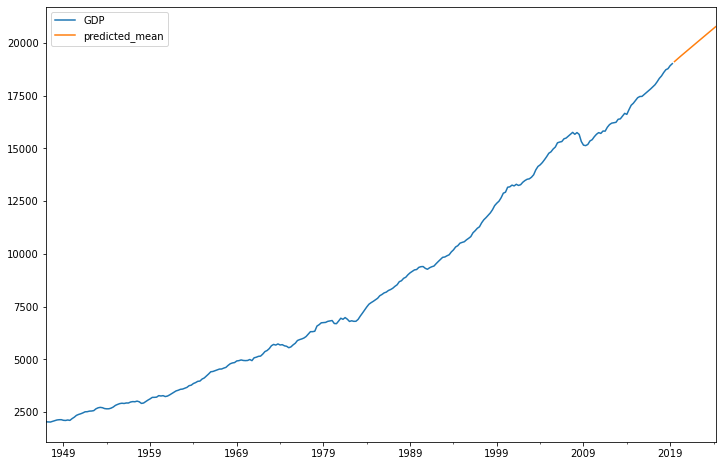

In [148]:
GDP_forecast[['GDP', 'predicted_mean']].plot(figsize=(12, 8))

Graficamente:

# Resumen general:

Hemos visto varios elementos de estacionareidad y autocorrelación, reunamoslo en un análisis compacto.

1. Chequeamos la estacionareidad usando media y varianza movil y el test de Dickey-Fuller aumentado.

Para esto creamos una función, que depende de una ventana para los análisis (w) y con esta, revisamos la serie de tiempo (ts)
   


In [149]:
def stationarity_check(ts, w):
            
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=w, center=False).mean()
    roll_std = ts.rolling(window=w, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(ts) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results

    print('\nResults of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)



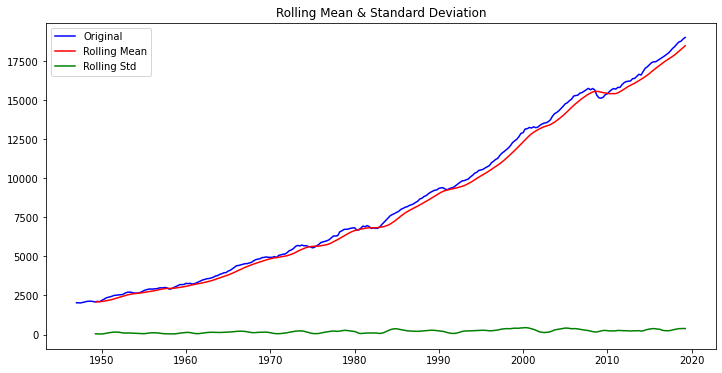


Results of Dickey-Fuller Test: 

Test Statistic                   2.962229
p-value                          1.000000
#Lags Used                      12.000000
Number of Observations Used    277.000000
Critical Value (1%)             -3.454180
Critical Value (5%)             -2.872031
Critical Value (10%)            -2.572360
dtype: float64


In [150]:
#ejemplo con GPD y w=10

stationarity_check(GDP, w=10)


Claramente la serie NO es estacionaria. Ahora necesitamos sacarle las tendencias para proceder

2. Aplicamos una descomposición con seasonal_dceomposition() desde statsmodels.tsa.seasonal para visualizar las tendencias, la estacionalidad y residuos.


In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose


def decomposition_plot(ts):
# Apply seasonal_decompose 
    decomposition = seasonal_decompose(np.log(ts))
    
# Get trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()


<AxesSubplot:xlabel='DATE'>

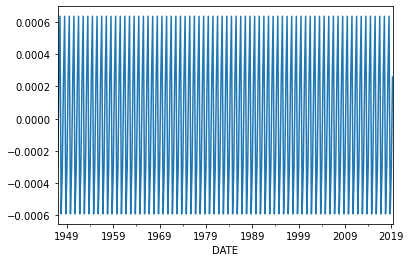

In [208]:
decomposition = seasonal_decompose(np.log(GDP['GDP']))
seasonal = decomposition.seasonal
seasonal.plot()

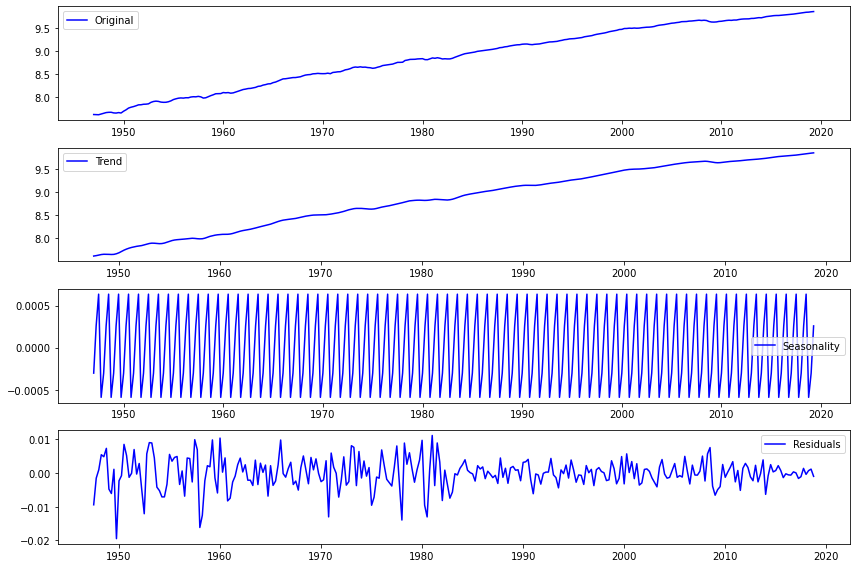

In [152]:
decomposition_plot(GDP)

2. Realizamos una diferenciación para eliminar las tendencias. 

In [153]:
GDP['1 diff']= GDP['GDP']-GDP['GDP'].shift(1)
GDP

,GDP,1 diff
DATE,,
1947-01-01,2033.061,NaN
1947-04-01,2027.639,-5.422
1947-07-01,2023.452,-4.187
1947-10-01,2055.103,31.651
1948-01-01,2086.017,30.914
...,...,...
2018-04-01,18598.135,159.881
2018-07-01,18732.720,134.585
2018-10-01,18783.548,50.828


In [154]:
A=pd.DataFrame(GDP['1 diff'])
A=A.dropna() # ya que al diferenciar se pierden observaciones

Chequeamos si la serie diferenciada elimina la tendencia. Sino, volvemos a diferenciar.

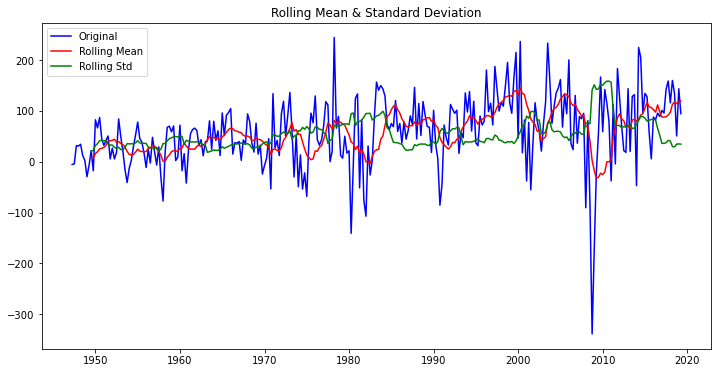


Results of Dickey-Fuller Test: 

Test Statistic                  -4.109942
p-value                          0.000933
#Lags Used                      11.000000
Number of Observations Used    277.000000
Critical Value (1%)             -3.454180
Critical Value (5%)             -2.872031
Critical Value (10%)            -2.572360
dtype: float64


In [155]:
stationarity_check(A, 10)

3. Graficamos la autocorrelacion total y parcial, para proveer informacion sobre posibles (p,d,q) para modelar.

In [156]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [157]:
def plot_acf_pacf(ts, figsize=(10,8),lags=30):
    
    fig,ax = plt.subplots(nrows=3, figsize=figsize)
    
    # Plot ts
    ts.plot(ax=ax[0])
    
    # Plot acf, pavf
    plot_acf(ts.dropna(), ax=ax[1], lags=lags)
    plot_pacf(ts.dropna(), ax=ax[2], lags=lags) 
    fig.tight_layout()
    
   

C:\Users\pablo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


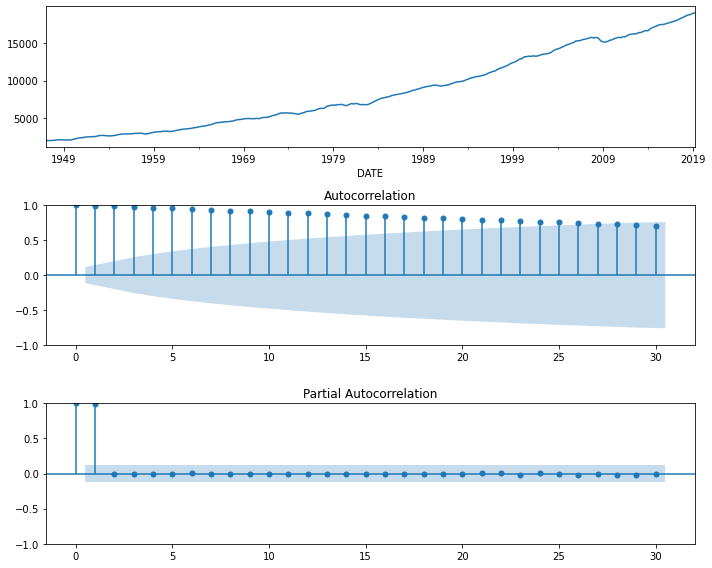

In [158]:
 plot_acf_pacf(GDP['GDP'], figsize=(10,8),lags=30)

4. Proceder con la modelacion, ya sea usando ARIMA o auto_arima. Y en base a este realizar comprobaciones de ajuste o predicciones.

In [159]:
model=auto_arima(GDP['GDP'], start_p=0, start_q=0)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  290
Model:               SARIMAX(2, 2, 1)   Log Likelihood               -1592.341
Date:                Sun, 16 Oct 2022   AIC                           3192.681
Time:                        11:22:45   BIC                           3207.333
Sample:                    01-01-1947   HQIC                          3198.553
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2925      0.046      6.353      0.000       0.202       0.383
ar.L2          0.1677      0.051      3.297      0.001       0.068       0.267
ma.L1         -0.9765      0.014    -68.045      0.000      -1.005      -0.948
sigma2      3688.7172    195.218     18.895      0.000    3306.098    4071.337
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               367.68
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Modelos VAR (Vector AutoRegression)

In [160]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

# Leyendo los datos

In [161]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [162]:
ice_cream_heater_df = pd.read_csv('ice_cream_vs_heater.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

C:\Users\pablo\AppData\Local\Temp\ipykernel_22244\3047748669.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ice_cream_heater_df = pd.read_csv('ice_cream_vs_heater.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [163]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

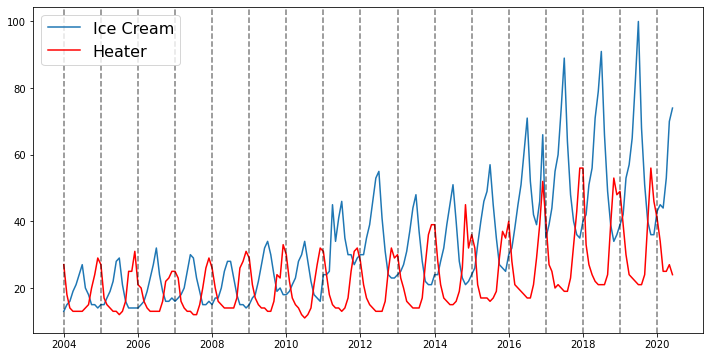

In [164]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

# Normalizando

In [165]:
avgs = ice_cream_heater_df.mean()
devs = ice_cream_heater_df.std()

In [166]:
for col in ice_cream_heater_df.columns:
    ice_cream_heater_df[col] = (ice_cream_heater_df[col] - avgs.loc[col]) / devs.loc[col]

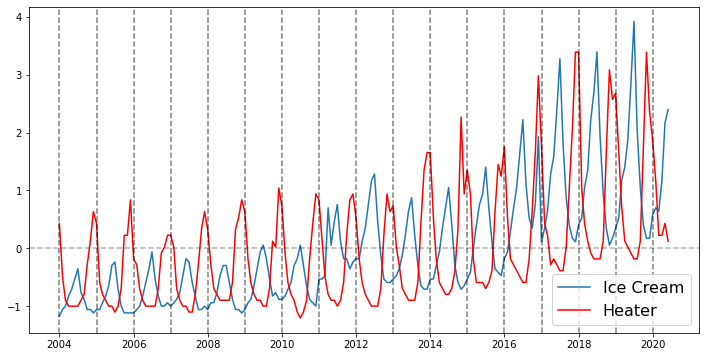

In [167]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

# Tomando la primera diferencia para remover la tendencia

In [168]:
ice_cream_heater_df = ice_cream_heater_df.diff().dropna()

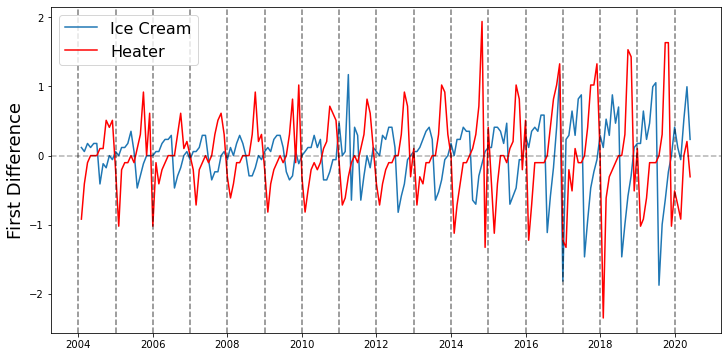

In [169]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

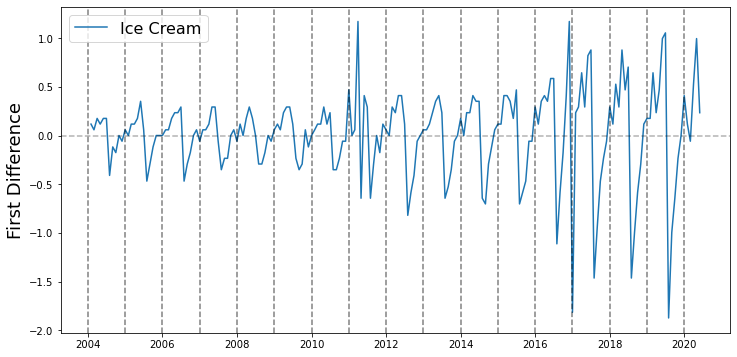

In [170]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

# Removiendo la volatilidad incrementada

In [171]:
annual_volatility = ice_cream_heater_df.groupby(ice_cream_heater_df.index.year).std()

In [172]:
annual_volatility

,heater,ice cream
Month,,
2004,0.415481,0.184201
2005,0.474527,0.214837
2006,0.400148,0.227698
2007,0.359839,0.198947
2008,0.396182,0.183239
2009,0.499810,0.221038
2010,0.459566,0.211668
2011,0.443924,0.501018
2012,0.471104,0.389711


In [173]:
ice_cream_heater_df['ice_cream_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year, 'ice cream'])
ice_cream_heater_df['heater_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year, 'heater'])

In [174]:
ice_cream_heater_df

,heater,ice cream,ice_cream_annual_vol,heater_annual_vol
Month,,,,
2004-02-01,-0.918789,0.117140,0.184201,0.415481
2004-03-01,-0.408351,0.058570,0.184201,0.415481
2004-04-01,-0.102088,0.175710,0.184201,0.415481
2004-05-01,0.000000,0.117140,0.184201,0.415481
2004-06-01,0.000000,0.175710,0.184201,0.415481
...,...,...,...,...
2020-02-01,-0.714614,0.117140,0.369810,0.426657
2020-03-01,-0.918789,-0.058570,0.369810,0.426657
2020-04-01,0.000000,0.527129,0.369810,0.426657


In [175]:
ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] / ice_cream_heater_df['ice_cream_annual_vol']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] / ice_cream_heater_df['heater_annual_vol']

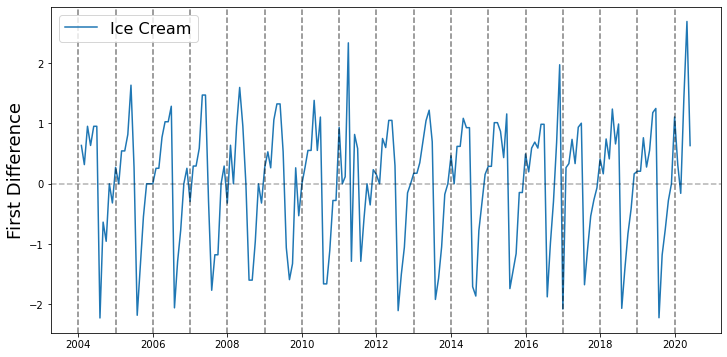

In [176]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

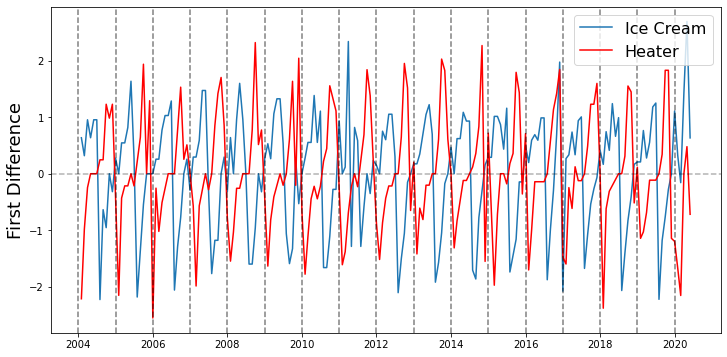

In [177]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

# Removiendo Estacionalidad

In [178]:
month_avgs = ice_cream_heater_df.groupby(ice_cream_heater_df.index.month).mean()

In [179]:
print(month_avgs)

         heater  ice cream  ice_cream_annual_vol  heater_annual_vol
Month                                                              
1     -0.428360   0.130345              0.415976           0.580717
2     -1.483129   0.250194              0.402342           0.570997
3     -1.063595   0.433016              0.402342           0.570997
4     -0.442926   0.838085              0.402342           0.570997
5     -0.121663   0.967273              0.402342           0.570997
6     -0.128425   0.987311              0.402342           0.570997
7     -0.107093   0.735052              0.404376           0.580018
8      0.075720  -1.821285              0.404376           0.580018
9      0.544638  -1.307661              0.404376           0.580018
10     1.613170  -0.830889              0.404376           0.580018
11     1.183118  -0.088136              0.404376           0.580018
12     0.491641   0.088998              0.404376           0.580018


In [180]:
ice_cream_heater_df['ice_cream_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'ice cream'])
ice_cream_heater_df['heater_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'heater'])

In [181]:
ice_cream_heater_df

,heater,ice cream,ice_cream_annual_vol,heater_annual_vol,ice_cream_month_avg,heater_month_avg
Month,,,,,,
2004-02-01,-2.211387,0.635934,0.184201,0.415481,0.250194,-1.483129
2004-03-01,-0.982838,0.317967,0.184201,0.415481,0.433016,-1.063595
2004-04-01,-0.245710,0.953901,0.184201,0.415481,0.838085,-0.442926
2004-05-01,0.000000,0.635934,0.184201,0.415481,0.967273,-0.121663
2004-06-01,0.000000,0.953901,0.184201,0.415481,0.987311,-0.128425
...,...,...,...,...,...,...
2020-02-01,-1.674916,0.316756,0.369810,0.426657,0.250194,-1.483129
2020-03-01,-2.153463,-0.158378,0.369810,0.426657,0.433016,-1.063595
2020-04-01,0.000000,1.425403,0.369810,0.426657,0.838085,-0.442926


In [182]:
ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] - ice_cream_heater_df['ice_cream_month_avg']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] - ice_cream_heater_df['heater_month_avg']

In [183]:
ice_cream_heater_df

,heater,ice cream,ice_cream_annual_vol,heater_annual_vol,ice_cream_month_avg,heater_month_avg
Month,,,,,,
2004-02-01,-0.728257,0.385740,0.184201,0.415481,0.250194,-1.483129
2004-03-01,0.080757,-0.115049,0.184201,0.415481,0.433016,-1.063595
2004-04-01,0.197217,0.115816,0.184201,0.415481,0.838085,-0.442926
2004-05-01,0.121663,-0.331339,0.184201,0.415481,0.967273,-0.121663
2004-06-01,0.128425,-0.033411,0.184201,0.415481,0.987311,-0.128425
...,...,...,...,...,...,...
2020-02-01,-0.191787,0.066562,0.369810,0.426657,0.250194,-1.483129
2020-03-01,-1.089868,-0.591394,0.369810,0.426657,0.433016,-1.063595
2020-04-01,0.442926,0.587318,0.369810,0.426657,0.838085,-0.442926


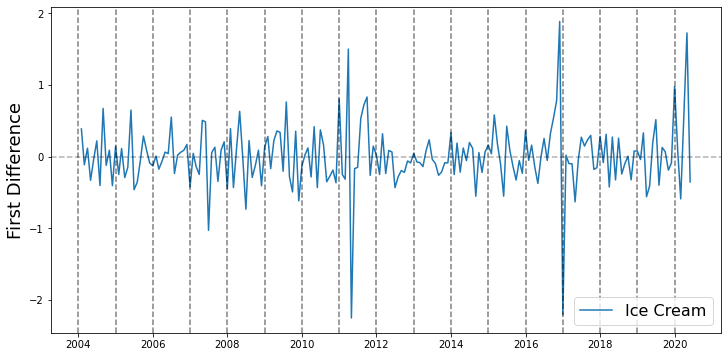

In [184]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

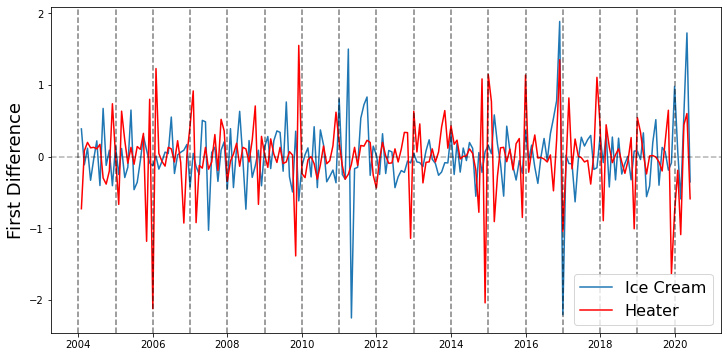

In [185]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

# PACF - Heater

C:\Users\pablo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


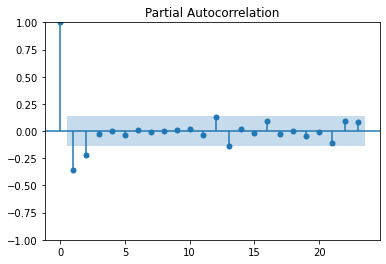

In [186]:
plot_pacf(ice_cream_heater_df['heater'])
plt.show()

## Entonces, consideremos un AR(2)

# Correlación entre "heater" y lagged "ice cream"

In [187]:
for lag in range(1, 14):
    heater_series = ice_cream_heater_df['heater'].iloc[lag:]
    lagged_ice_cream_series = ice_cream_heater_df['ice cream'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(heater_series, lagged_ice_cream_series))
    print('------')

Lag: 1
(-0.0315445074259157, 0.660728499174997)
------
Lag: 2
(-0.09872703210944635, 0.1697084190508982)
------
Lag: 3
(-0.0017838553789235392, 0.9803056762962026)
------
Lag: 4
(0.06023971859825537, 0.4052979832528944)
------
Lag: 5
(-0.054034864480150255, 0.45664426275062703)
------
Lag: 6
(0.06461183026553832, 0.37453000434455314)
------
Lag: 7
(-0.04949334618415869, 0.49768766857621993)
------
Lag: 8
(0.07890837135977347, 0.2804548970433355)
------
Lag: 9
(-0.053235016996004275, 0.4681034202228288)
------
Lag: 10
(0.02953698906079119, 0.6882054906332707)
------
Lag: 11
(-0.059795363515225686, 0.41752174204858805)
------
Lag: 12
(-0.07513046035981785, 0.3094409252542959)
------
Lag: 13
(0.1980890219842975, 0.007029107082073426)
------


# Ajustando un VAR Model

In [188]:
ice_cream_heater_df = ice_cream_heater_df[['ice cream', 'heater']]

In [189]:
model = VAR(ice_cream_heater_df)

In [190]:
model_fit = model.fit(maxlags=13)

In [191]:
# ojo, imprime resultados para ambas variables (ice cream y heater) como variables dependientes
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 16, Oct, 2022
Time:                     11:22:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.92349
Nobs:                     184.000    HQIC:                  -2.48459
Log likelihood:          -204.405    FPE:                  0.0571123
AIC:                     -2.86700    Det(Omega_mle):       0.0434311
--------------------------------------------------------------------
Results for equation ice cream
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.016054         0.034105           -0.471           0.638
L1.ice cream         -0.287811         0.079633           -3.614           0.000
L1.heater            -0.121251         0.073673         

$$
\hat{h}_t = - 0.41h_{t-1} - 0.19h_{t-2} + 0.2i_{t-13}
$$

## Granger Causality:

- Intuicion: una ts puede ayudar a predecir otra ts
- No es causalidad en sí, es una versión “fruna”, que si se cumple es consistente con una dirección causal, lo que puede ser bastante útil. 
- Tres pasos:
        1. Mejor modelo AR para la serie 1
        2. Se añaden términos de la serie 2 y sus lags y se prueban haciendo test-t para ver cada lag es por si mismo es significativo, o sea, útil para predecir la serie 1. Al final, vamos a tener algunos lags de la serie 2 en el modelo, se hace un F-test para ver si todos juntos mejoran el modelo. 
        3. Finalmente se concluye que si algún lag de la serie 2 pasa las pruebas, se dice que la serie 2 “Granger causes” la serie 1. Esto significa que encontramos que si conocemos información sobre los rezagos de la serie 2, vamos a poder predecir significativamente mejor la serie 1.
  


In [192]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [193]:
#Construyamos la serie de tiempo, solo un AR(1) simple
t1 = [0.1*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())

In [194]:
# Construyamos la serie 2 que es granger caused por t1
t2 = [item + 0.1*np.random.normal() for item in t1]

In [195]:
#ajustar t1 y t2
t1 = t1[3:]
t2 = t2[:-3]

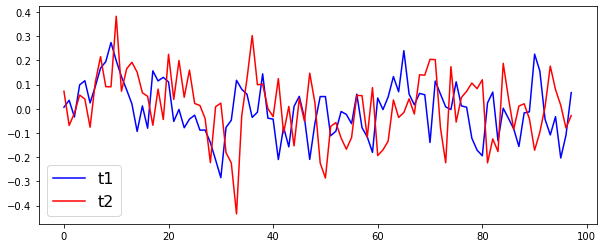

In [196]:
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

plt.legend(['t1', 't2'], fontsize=16)

In [197]:
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))

In [198]:
ts_df

,t2,t1
0,0.072294,0.006354
1,-0.068980,0.034886
2,-0.018656,-0.034096
3,0.056583,0.098579
4,0.040154,0.115871
...,...,...
93,0.176282,-0.108194
94,0.078962,-0.032675
95,0.014250,-0.203517
96,-0.079620,-0.109503


In [199]:
gc_res = grangercausalitytests(ts_df, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9620  , p=0.0097  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=7.1842  , p=0.0074  , df=1
likelihood ratio test: chi2=6.9306  , p=0.0085  , df=1
parameter F test:         F=6.9620  , p=0.0097  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=10.0969 , p=0.0001  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=21.3034 , p=0.0000  , df=2
likelihood ratio test: chi2=19.2399 , p=0.0001  , df=2
parameter F test:         F=10.0969 , p=0.0001  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=34.1722 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=110.6712, p=0.0000  , df=3
likelihood ratio test: chi2=73.3782 , p=0.0000  , df=3
parameter F test:         F=34.1722 , p=0.0000  , df_denom=88, df_num=3


No hay evidencia de Granger causality para lags 1 y 2, pero si para lag=3!!!